# Исследование данных о продажах компьютерных игр.

**Описание данных:**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель исследования**

1. Выявление факторов и закономерностей, влияющих на успешность компьютерных игр.

**Ход исследования**
Данные о продажах получены из файла `'datasets/games.csv'`. О качестве данных ничего не известно, поэтому перед тем, как приступать к целям исследования, понадобится обзор данных. В описании к данным указано, что сведения по 2016 году могут быть неполными.



Проверим данные на наличие пропусков, ошибок, дубликатов и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможности исправить все недостатки данных, если это не приведет к искажению конечного результат. Далее приступим к проведению исследовательского анализа и определению продаж игр по годам, платфомам и жанрам игр, после чего определим платформы и жанры наиболее популярные в отдельных регионах, а также оценим влияние рейтинга ESRB на продажи, а затем проверим ряд гипотез.

Таким образом, исследование пройдет в восемь этапов:

- Обзор данных
- Предобработка данных
- Исследовательский анализ по годам, платформам и жанрам
- Определение популярности платформ по регионам
- Определение популярности жанра игр по регионам
- Оценка влияния рейтинга ESRB на продажи
- Проверка гипотез
- Написание общего вывода

### Открытие файла с данными и изучение общей информации.

Первоначально импортируем библиотеки, которые нам понадобятся в работе.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy import stats as st

Также настроим размеры отображаемых в последствии графиков.

In [2]:
rcParams['figure.figsize'] = 18, 8
sns.set(style='darkgrid')

Откроем файл с данными и взглянем на их состояние.

In [3]:
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    df = pd.read_csv('D:/learn_data/games.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Файл успешно открыт, в нем мы видим данные о продажах компьютерных игр на различных платформах. В датафрейме имеется 11 колонок. Наименование столбцов приведем в принятый в python вид позднее. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Как видно из общей информации о фрейме данных, всего в нем содержатся сведения о 16715 играх, при этом в 6 из 11 колонок имеются пропуски, с которыми будем решать вопросы в дальнейшем. Кроме того, в 6 из 11 колонок содержаться данные типа *float64*, в остальных типа *object*, но для ряда колонок далее мы исправим тип.  

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Взглянув на список характерных значений датафрейма, можно сказать, что в нем содержатся сведения об играх, выпущенных за период с 1980 года по 2016 год. В то же время в данном случае приведены не все столбцы, так осутствует столбец с данными об оценках пользователей (поскольку он имеет тип *object*). В дальнейшем тип будет исправлен. 

**Вывод:** Как видно из предварительного посмотра фрейма данных, в нем содержатся сведения о продажах 16715 компьютерных игр. При этом, поскольку сведения о продажах приведены по регионам (Северная Америка, Европа, Япония и другие), имеются основания полагать, что в значительном количестве случаев игры продавалсь не во всех регионах, в связи с чем имеются нулевые сведения о продажах игр в конкреном регионе более чем в 25% случаев (для Японии в более чем 50% случаях). Оценивая данные, содержащие сведения по 2, 3 квартилям и максимальному значению, имеются основания полагать, что в целом болшее количество игр продавалось в Северной Америке, а наименьшее в Японии и в других (не Северная Америка, Европа или Япония) странах (показатели продаж в Японии и других странах в целом близкие по размерам). Также можно сделать вывод о годах выпуска игр, так наибольшее количество игр выходило в период с 2003 по 2010 гг. (50% за 8 лет из общей выборки за 37 лет с 1980 по 2016 гг.), в период с 1980 по 2003 год игр выходило значительно меньше, также после 2010 года имеется тенденция к снижению их количества. 

### Подготовка данных.

#### Приведение названий столбцов к нижнему регистру.

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
#df = df.rename(columns={x: x.lower() for x in df.columns})
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Названия колонок, запсанных в "змеином стиле" в нижнем регистре, поможет нам избежать путаницы и случайных ошибок.

#### Преобразование данных в нужные типы и обработка имеющихся пропусков.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Как мы видим незначительное количество пропусков в датафрейме имеется в данных о наименовании игры, годе ее релиза, а также жанре данной игры. С учетом характера данных сведений, заменить пропуск каким-либо значением, которое не будет впоследствии искажать данные, не представляется возможным, в связи с чем строки с такими попусками лучше удалить. 

In [10]:
df.loc[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видно, 2 случая с пропусками в колонке `name` это игры на платформе *GEN* 1993 года релиза, в них же имеются те 2 пропуска в столбце `ganre`, также отсутствуют сведения об оценке критиков, пользователей и рейтинге. С учетом одного года выпуска на одной и той же платформе, первая из которых продавалась в странах, за исключением Японии, а вторая исключительно в Японии, возможно, это одна и та же игра с соответствующей локализацией. Причиной пропусков в данном случае могли быть разные факторы, в том числе технические ошибки при сборе данных. Полагаем возможным удалить данные строки, как наиболее приемлемый вариант, который не должен исказить общую картину, поскольку каких-либо данных, позволяющх адекватно заполнить пропуски, нам взять просто неоткуда. После чего взглянем на пропуски в колонке `year_of_release`.

In [11]:
df = df.dropna(subset=['name'])
print("Количество игр с отсутствующими сведениями о дате релиза:", df['year_of_release'].isna().sum())
df.loc[df['year_of_release'].isna() == True].head(10)

Количество игр с отсутствующими сведениями о дате релиза: 269


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Итак, у нас отсутствуют сведения о дате релиза 269 игр. Какой-либо закономерности в наличии пропусков на первый взгляд не имеется (эти игры выходили на различных платформах, были разных жанров, продавались в различных странах и т.п.). Вполне вероятно, что причиной отсутствия сведений о годе их выпуска, могла быть обычная техническая ошибка при сборе данных. В то же время имеется идея о том, что зачастую игра выходит одновременно на различных платформах. 

In [12]:
df.loc[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [13]:
df.loc[df['name'] == 'LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Действительно, как мы видим, игра *Madden NFL 2004* вышла на 4 разных платформах, при этом на 3 платформах указан 2003 год релиза, из чего можно предположить, что на платформе *PS2* она также вышла в том же году. Аналогичные случаи имеют место и в ряде других игр (например, в игре *LEGO Batman: The Videogame*).

In [14]:
df.loc[df['name'] == 'Space Invaders']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


Однако есть и игры с одним наименованием, релизы которых осуществлялись на разных платформах в различное время, как, например, игра *Space Invaders*.

In [15]:
df.loc[df['name'] == 'Rock Band']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


Либо у игры отсутствуют сведения о дате их релиза на всех платформах как, например, у игры *Rock Band*.

In [16]:
df.loc[df['name'] == "Frogger's Adventures: Temple of the Frog"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Либо игра вообще выпускалась только на одной платформе как, например, *Frogger's Adventures: Temple of the Frog*.

Взглянем на количество уникальных наименований таких игр, в которых хотя бы на одной платфоме отсутствует дата релиза.

In [17]:
len(df['name'][df['year_of_release'].isna() == True].unique())

232

С учетом того, что из 269 наименований игр без указания года выпуска 232 уникальных, логично предположить, что большая часть из них не имеют сведений в фрейме данных о годе релиза только в 1 случае. Создадим список с уникаьными наименованиями игр, в которых отсутствует дата релиза (на какой-либо платформе).

In [18]:
games_without_year = list(df['name'][df['year_of_release'].isna() == True].unique())

Теперь в случае, если у игры в данном списке, имелись также ее выходы на других платформах, в которых имеются сведения о дате их релиза, причем в случае нескольких дат релиза на разных платформах в них указан один и тот же год, мы заменим отсутствующие сведения в дате релиза на других платформах, на имеющийся год (исходя из преположения, что все они на разных платформах были выпущены в один год).

In [19]:
for game in games_without_year:
    temp = df.loc[df["name"] == game]
    temp = temp.dropna(subset=['year_of_release'])
    if temp.size == 0:
        continue
    if len(temp['year_of_release'].unique()) != 1:
        continue
    df.loc[df["name"] == game, 'year_of_release'] = df.loc[df["name"] == game, 'year_of_release'].fillna(int(temp['year_of_release'].unique()))

In [20]:
df['year_of_release'].isna().sum()

158

Как мы видим, число попусков сокращено с 269 до 158.

На всякий случай проверим, верно ли произошла замена, взяв для примера просмотренные выше игры. 

In [21]:
df.loc[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [22]:
df.loc[df['name'] == 'LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,2008.0,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,2008.0,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Действительно, замена произошла верно на нужный год. Что касается остальных игр, в которых пропущена дата их релиза, мы могли бы поискать дату релиза в други источниках, например, в ручную или с помощью SQL, но для экономии времени просто удалим сведения об этих играх (предполагая, что пропуски совершенн случайны), благо их немного.

In [23]:
df = df.dropna(subset=['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16555 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16555 non-null  object 
 1   platform         16555 non-null  object 
 2   year_of_release  16555 non-null  float64
 3   genre            16555 non-null  object 
 4   na_sales         16555 non-null  float64
 5   eu_sales         16555 non-null  float64
 6   jp_sales         16555 non-null  float64
 7   other_sales      16555 non-null  float64
 8   critic_score     8068 non-null   float64
 9   user_score       9926 non-null   object 
 10  rating           9860 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Далее приступим к решению вопроса о пропусках в сведениях об оценках критиков, пользователей и рейтинге игр, которых значительное количество. Для начала взглянем на их уникальные значения.

In [24]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

Как мы видим, оценки критиков фактически представлены в виде двузначных целых чисел. Также тут присутствуют пропуски, нулевых оценок не имеется. Причинами таких пропусков могут быть как случайные факторы, так и те, которые являются не случайными, например, издатель игры не пожелал получить оценку от критиков, либо игра прошла мимо критиков незамеченной, либо игра издавалась в тот период, когда выставление критиками оценок еще не набрало свою популярность, либо распространялась в регионе, в котором оценка критиков не играла существенной роли и т.п. В то же время факт отсутствия сведений об оценке критиков может играть определенную роль при проведении анализа данных. Для дальнейшего удобства работы присвоим играм, у которых отсутствует оценка от критиков, оценку **-1**, которая будет означать именно отсутствие оценки. В тех же сучаях, когда оценка критиков будет иметь существенное значение для исследования, вычисления будем производить без сведений о данных играх.   

In [25]:
df['critic_score'] = df['critic_score'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16555 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16555 non-null  object 
 1   platform         16555 non-null  object 
 2   year_of_release  16555 non-null  float64
 3   genre            16555 non-null  object 
 4   na_sales         16555 non-null  float64
 5   eu_sales         16555 non-null  float64
 6   jp_sales         16555 non-null  float64
 7   other_sales      16555 non-null  float64
 8   critic_score     16555 non-null  float64
 9   user_score       9926 non-null   object 
 10  rating           9860 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [26]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Oценки пользователей представлены в виде дробных чисел от **0** до **10**. При этом следует отметить, что верхней отметки всё же нет, что является логичным, поскольку в при значительном количестве оценщиков найдется лицо, которое поставит отметку ниже **10**, в таком случае возникает вопрос об наличии отметки **0** (неужели не нашлось пользователей, которые поставили бы оценку хотя бы чуть выше нулевой?). Также тут присутствуют пропуски. Причинами таких пропусков могут быть как случайные факторы, так и те, которые являются не случайными, например, игра издавалась в тот период, когда выставление пользователями оценок еще не набрало свою популярность, либо распространялась в регионе, в котором такая оценка не играла существенной роли, либо пользователям возможность оценить игру не предоставлялась и т.п. В то же время факт отсутствия сведений об оценке пользоваелей может играть определенную роль при проведении анализа данных. Для дальнейшего удобства работы присвоим играм, у которых отсутствует оценка от пользователей, оценку **-1**, которая будет означать именно отсутствие оценки. В тех же сучаях, когда оценка пользователей будет иметь сущесвтенное значение для исследования, вычисления будем производить без сведений о данных играх. Кроме того, среди оценок пользователей имеется оценка `tbd`, что является аббревиатурой от `to be determined`, которая обычно означает, что игра еще не вышла и возможность оценить игру будет предоставлена пользователям позднее (в данном случае полагается, что игра еще не вышла к тому времени, когда осуществлялся сбор данных), либо возможность оценки игры пользователям так и не была представлена, несмотря на обещание этого. Для дальнейшего удобства работы присвоим играм, у которых оценка от пользователей указана как `tbd`, оценку **-2**, которая будет означать именно отсутствие реальной оценки, несмотря на обещание разаботчиков игры. В исследованиях, для которых будет иметь значение именно оценка пользователей, данные игры также не будут учавствовать в анализе.    

In [27]:
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'] = df['user_score'].mask(df['user_score'] == 'tbd', -2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16555 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16555 non-null  object 
 1   platform         16555 non-null  object 
 2   year_of_release  16555 non-null  float64
 3   genre            16555 non-null  object 
 4   na_sales         16555 non-null  float64
 5   eu_sales         16555 non-null  float64
 6   jp_sales         16555 non-null  float64
 7   other_sales      16555 non-null  float64
 8   critic_score     16555 non-null  float64
 9   user_score       16555 non-null  object 
 10  rating           9860 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [28]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Как мы видим, в рейтинге ESRB представленных в датафрейме игр имеется 8 различных рейтинговых значений, также имеются пропуски, которые могли быть получены как случайно, так и вследствие целенаправленных действий (нежелание издателя игры получать рейтинг, распространение игры в регионе, в котором данный рейтинг являетя необязательным и т.п.). В данном случае оставим пропуски как есть.

Далее, после обработки пропусков, приступим к изменению типов данных в ряде столбцов. Так, логичным выглядит привести данные о годе выпуска игры и рейтинге критиков к типу `int`, а сведения об оценках пользователей к типу `float`. 

In [29]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].astype('float')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16555 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16555 non-null  object 
 1   platform         16555 non-null  object 
 2   year_of_release  16555 non-null  int64  
 3   genre            16555 non-null  object 
 4   na_sales         16555 non-null  float64
 5   eu_sales         16555 non-null  float64
 6   jp_sales         16555 non-null  float64
 7   other_sales      16555 non-null  float64
 8   critic_score     16555 non-null  int64  
 9   user_score       16555 non-null  float64
 10  rating           9860 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


#### Создание столбца с данными о суммарных продажах во всех регионах.

In [31]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN,31.38


Также к окончанию предобработки данных проверим датафрейм на наличие явных дубликатов.

In [32]:
df.duplicated().sum()

0

**Вывод:**  В ходе предобработки данных мы решили вопрос пропусков в ряде стобцов (оставив их только в колонке `'rating'`, где они нам не препятствуют дальнейшей работе), изменили тип данных в стобцах `'year_of_release'`, `'critic_score'` и `'user_score'`, добавили столбец с данными об общей продаже игр во всех регионах, проверили датафрейм на явные дубликаты. Также обратили внимание, что встречаются игры имеющие одинаковое название, но в таком случае они выходили на различных платформах или это были локализации для различых регионов, таким образом, это разные варианты одной игры.

### Исследовательский анализ данных.

#### Изучение статистики выхода игр в разные годы.

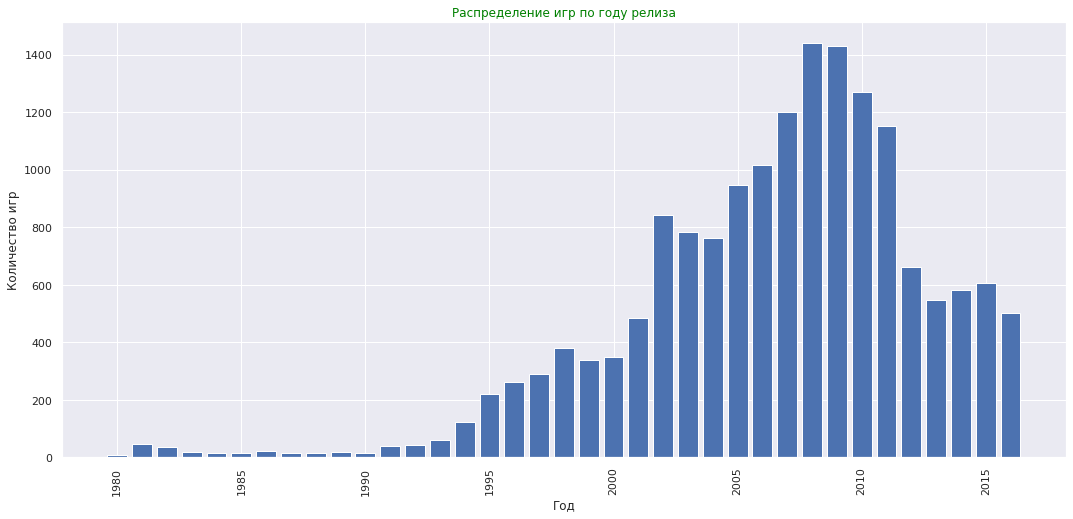

In [33]:
pivot_by_year = df.pivot_table(index=['year_of_release'], values=['name'], aggfunc=['count']).reset_index().droplevel(1, axis=1)
plt.bar(x=pivot_by_year['year_of_release'], height=pivot_by_year['count'])
plt.title('Распределение игр по году релиза', c='green')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=90)
plt.show;

Как видно из графика, количество выпускаемых игр по году релиза распределено неравномерно, так в период с 1980 по 1990 количество игр в среднем находилось на одном уровне, в перод с 1990 по 2000 год начинается планомерный рост количества выпускаемых игр, после чего их объем на рынке начинает расти очень стремительно, достигая своего пика в 2008-2009 гг. (свыше 1400 игр в год), после чего к 2012 году происходит их резкое сокращение примерно в 2 раза, а в период 2012-2016 гг. находятся примерно на одном уровне (в районе 600 игр в год). Это связано, вероятно, как с изменением популярности компьютерных игр, а также подходами к их созданию и распространению, естественно в течение этого времени должны были менятся и платформы, на которых они выпускались, что также связано с прогрессом в данной сфере, развитием информационных технологий и постепенным устареванием отдельных платформ. Резкое падение количества выпускаемых игр в 2012 году, возможно связано с ростом популярности игр на не учтенных в датасете мобильных устройствах (iOS, Android), которые в последние годы приобретают всё большую популярность, в связи с чем разработчиком игр пришлось адаптироваться к новым условиям рынка. Кроме того, у нас нет ясности о способах определения количества продаж и их полноте. 

#### Рассмотрение изменений продаж по платформам. Выбор платформ с наибольшими суммарными продажами и построение распределения по годам. Определение характерного срока появления новых и исчезновения старых платформ.

Давайте взглянем, на каких же платформах выпускались игры согласно данным фрейма.

In [34]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [35]:
len(df['platform'].unique())

31

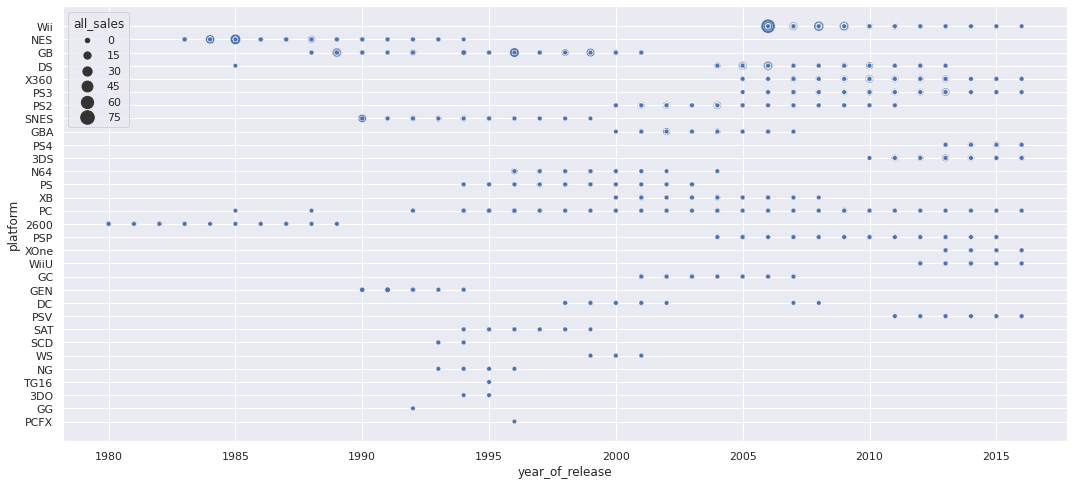

In [36]:
sns.scatterplot(x="year_of_release", y="platform"\
                ,size="all_sales"\
                ,data=df\
                ,sizes=(20, 200));

Как мы видим, из 31 представленной во фрейме данных платформы, до 2016 года "дожило" всего 9 из них (возможно 10, учитывая неполноту данных за 2016 год). Несомненным долгожителем разумеется является PC, поскольку персональные компьютеры появились давно, успешно адаптрируются вслед за изменением технологий (модернизация иных платформ крайне затруднительна) и никуда в ближайшее время уходить не собираются. В то же время такие производители платформ как *Xbox* и *Playstation* дабы оставаться на рынке в условиях развития технологий разабатывают новые платформы, которые постепенно заменяют выпупущенные ими ранее.

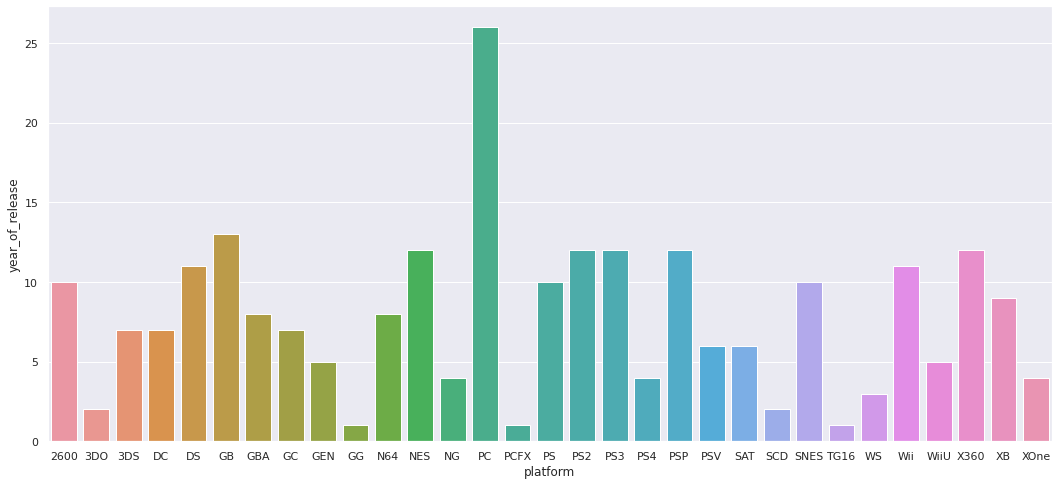

In [37]:
pivot_life_platform = (df.loc[:,['year_of_release', 'platform']]
                       .drop_duplicates()
                       .pivot_table(index=['platform'], values='year_of_release', aggfunc='count'))
sns.barplot(x=pivot_life_platform.index, y='year_of_release', data = pivot_life_platform)
plt.show();

Как мы видим, платформы "живут" различное время, некоторые всего 1 - 2 года, а лучшие достигают возраста 10-12 лет (РС естественный лидер "прожития").  

In [38]:
pivot_life_platform.mean()

year_of_release    7.774194
dtype: float64

Как видим среднее время существования релиза новых игр на платформах около 7-8 лет.

Далее взглянем на лучшие по продажам платформы.

In [39]:
df.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1245.96
X360     966.61
PS3      934.71
Wii      903.31
DS       804.28
PS       727.58
PS4      314.14
GBA      313.73
PSP      292.77
PC       258.51
Name: all_sales, dtype: float64

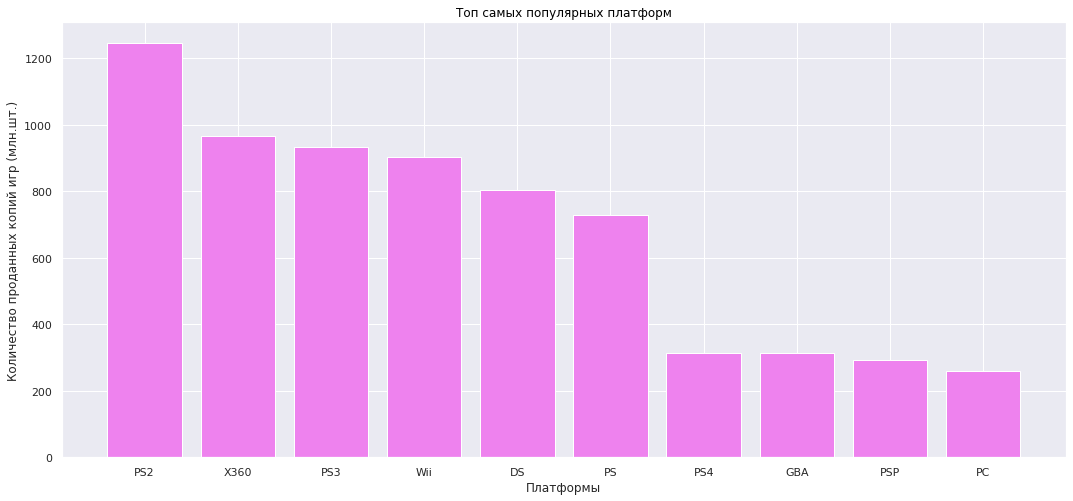

In [40]:
tmp = df.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(10)
plt.bar(x=tmp.index, height=tmp, color='violet')
plt.title('Топ самых популярных платформ', c='black')
plt.xlabel('Платформы')
plt.ylabel('Количество проданных копий игр (млн.шт.)')
plt.show;

Вот 10 платформ, продавших наибольшее количество копий игр. Наибольших успехов добилась платформа PS2, несколько отстает от нее платфома X360, однако для первой платформы в 2016 году уже новых игр не выпускается. Таким образом, в ходе дальнейшего анализа в целях построения кампании на 2017 год полагаем необходимым учитывать как изменения в количестве выходивших игр, так и платформы, на которых они выходят. Таким образом, возьмем данные за период с 2012 по 2015 гг., при этом исключим из них сведения по платформе *DS* , поскольку она по состоянию к 2016 году уже утратила свою актуальность (в то же время сведения по платфоме *PSP* оставим, поскольку учитывая неполноту данных за 2016 год, мы не можем достоверно утверждать, что данная платформа покинула рынок, а также не можем полноценно использовать данные за 2016 год).    

Посмотрим на распределение по годам продаж самых популярных платформ.

In [41]:
df_ps2 = df.loc[df['platform'] == 'PS2']
df_x360 = df.loc[df['platform'] == 'X360']
df_ps3 = df.loc[df['platform'] == 'PS3']
df_wii = df.loc[df['platform'] == 'Wii']
df_ds = df.loc[df['platform'] == 'DS']

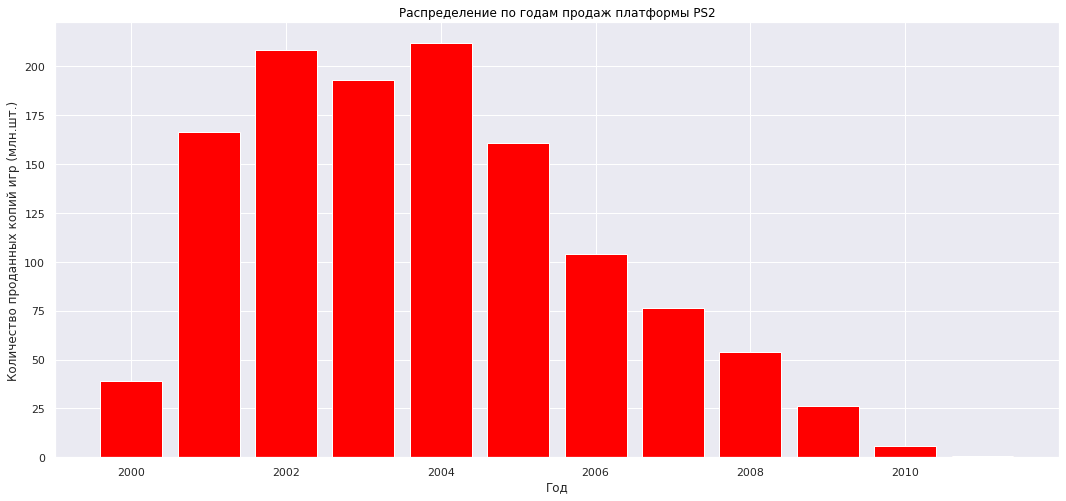

In [42]:
tmp = df_ps2.groupby('year_of_release')['all_sales'].sum()
plt.bar(x=tmp.index, height=tmp, color='red')
plt.title('Распределение по годам продаж платформы PS2', c='black')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт.)')
plt.show;

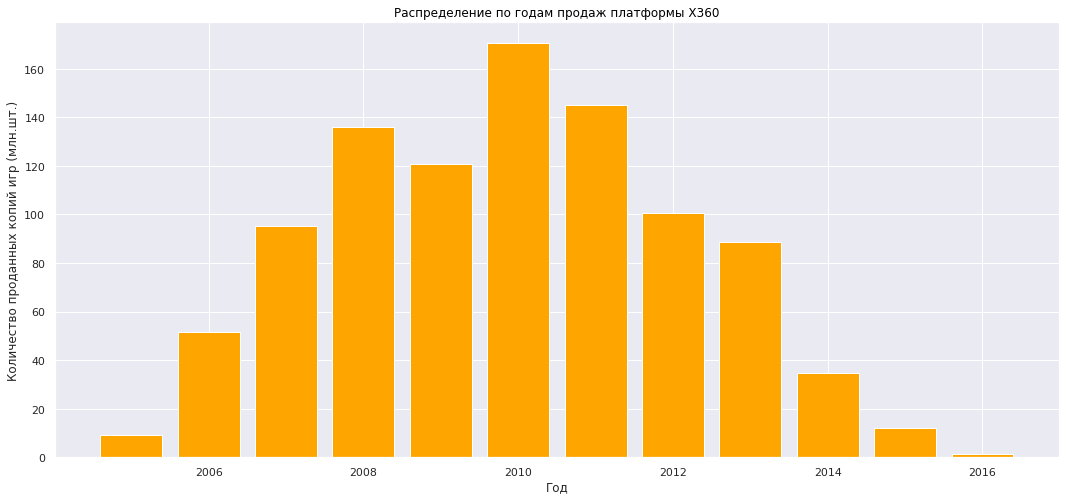

In [43]:
tmp = df_x360.groupby('year_of_release')['all_sales'].sum()
plt.bar(x=tmp.index, height=tmp, color='orange')
plt.title('Распределение по годам продаж платформы X360', c='black')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт.)')
plt.show;

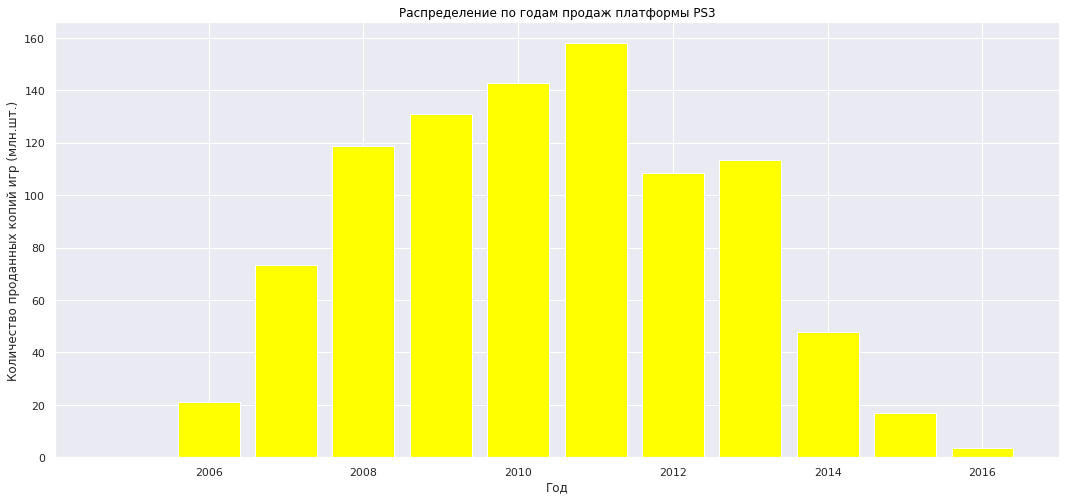

In [44]:
tmp = df_ps3.groupby('year_of_release')['all_sales'].sum()
plt.bar(x=tmp.index, height=tmp, color='yellow')
plt.title('Распределение по годам продаж платформы PS3', c='black')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт.)')
plt.show;

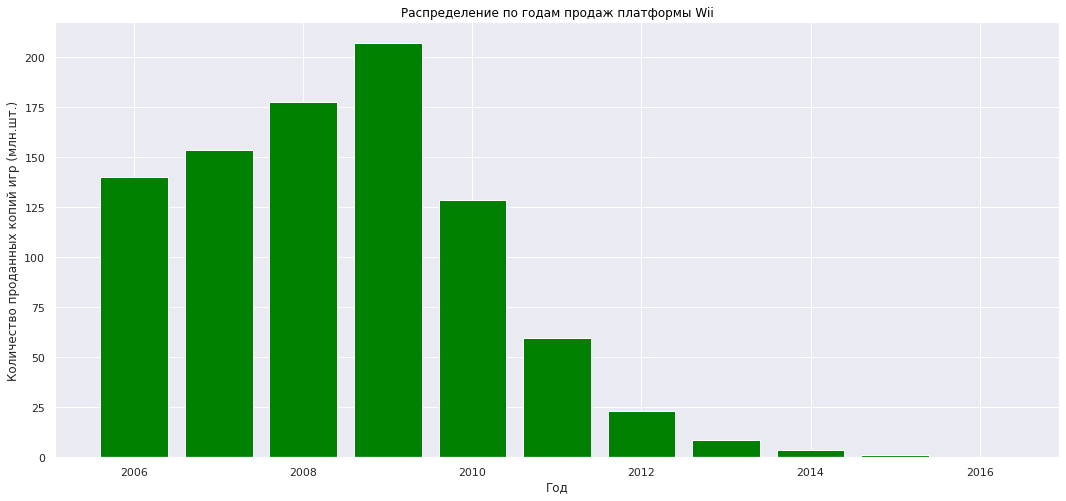

In [45]:
tmp = df_wii.groupby('year_of_release')['all_sales'].sum()
plt.bar(x=tmp.index, height=tmp, color='green')
plt.title('Распределение по годам продаж платформы Wii', c='black')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт.)')
plt.show;

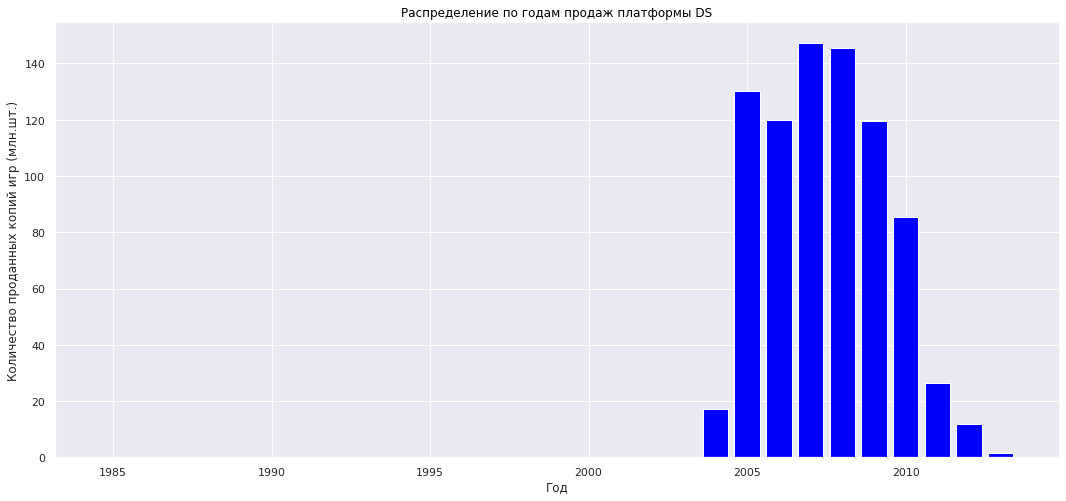

In [46]:
tmp = df_ds.groupby('year_of_release')['all_sales'].sum()
plt.bar(x=tmp.index, height=tmp, color='blue')
plt.title('Распределение по годам продаж платформы DS', c='black')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт.)')
plt.show;

Как мы видим, все эти платформы либо уже устарели для создания на них новых игр, либо находятся в конце процесса устаревания. Что касается платформы DS, ее значительное отклонение в правую сторону обусловлено тем, что в датафрейме находятся данные об игре на данной платформе, выпущенной в 1985 году, что является странным.

In [47]:
df.loc[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,NaN,0.02


По всей видимости в качестве даты релиза данной игры указана дата выхода самой игры на первоначальной платформе, а сама плафторма DS вышла лишь в 2000-х годах, после чего, вероятно, игра была перездана на данной платформе, однако дата переиздания неизвестна. Данный факт ставит под сомнение данные указанной строки, однако, в дальнейшем мы будет работать только по актуалной информации, в связи с чем данный случай в наш новый датафрейм не попадет.

Теперь для сравнения взглянем на продажи игр относительно новых платформ, для примера возьмем *XOne*.

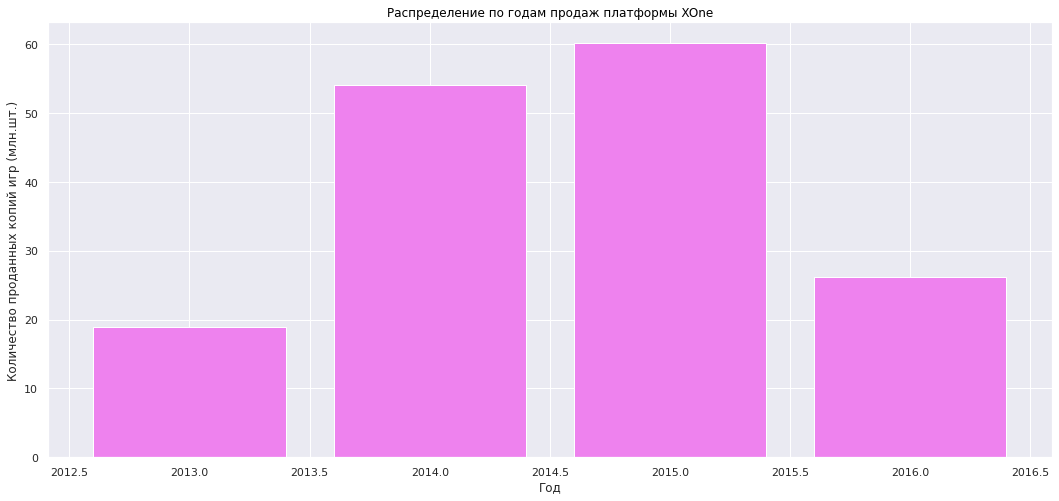

In [48]:
df_xone = df.loc[df['platform'] == 'XOne']
tmp = df_xone.groupby('year_of_release')['all_sales'].sum()
plt.bar(x=tmp.index, height=tmp, color='violet')
plt.title('Распределение по годам продаж платформы XOne', c='black')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт.)')
plt.show;

Указанный график показывает уверенный рост продаж игр на данной платформе. Учитывая тот факт, что за 2016 год данные не полные, сведения по данному году не могут учитываться в полном объеме, поскольку внесут существенное искажение в получаемые результаты, поскольку при наличии полных данных о продажах за 2016 год, данная платформа могла достигнуть уровня предыдущего года или даже показать рост).  

Таким образом, исходя из ранее сделанных исследований, разумным будет взять в качестве актуальных сведения за 2012-2015 гг. (исключив оттуда данные по неактуальной платформе DS). 

In [49]:
df_actual = df.loc[(df['platform'] != 'DS') & (df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2015)]
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2364 entries, 16 to 16707
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2364 non-null   object 
 1   platform         2364 non-null   object 
 2   year_of_release  2364 non-null   int64  
 3   genre            2364 non-null   object 
 4   na_sales         2364 non-null   float64
 5   eu_sales         2364 non-null   float64
 6   jp_sales         2364 non-null   float64
 7   other_sales      2364 non-null   float64
 8   critic_score     2364 non-null   int64  
 9   user_score       2364 non-null   float64
 10  rating           1326 non-null   object 
 11  all_sales        2364 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 240.1+ KB


Конечно, данных по играм стало существенно меньше, но это данные по тем играм, тенденции которых являются актуальными к 2017 году.

#### Определение лидирующх по продажам платформ, их раста или падения, выбор нескольких потенциально прибыльных платформ.

In [50]:
pivot_actual = df_actual.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
pivot_actual

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2012,51.76,23.45,108.28,NaN,7.95,16.19,22.94,17.56,100.72,NaN
2013,56.57,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


Из данной таблицы уже видны две платформы, показывающие рост продаж игр, но нагляднее это будет продемонстрировать на графике.

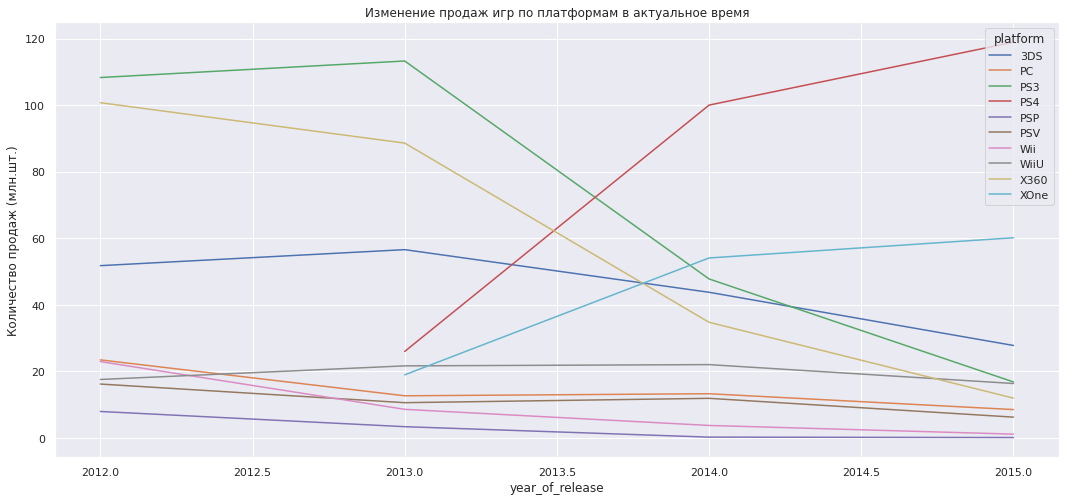

In [51]:
pivot_actual.plot(title='Изменение продаж игр по платформам в актуальное время', ylabel='Количество продаж (млн.шт.)');

Как видно из графика, рост продаж игр показывают две платформы *PS4* и *XOne* (они же являются лидерами по общему количеству продаж), которые пришли на смену показывающих существенный спад продаж с момента их появления соотвественно *PS3* и *X360*. Все остальные платформы показывают небольшой спад.  

#### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

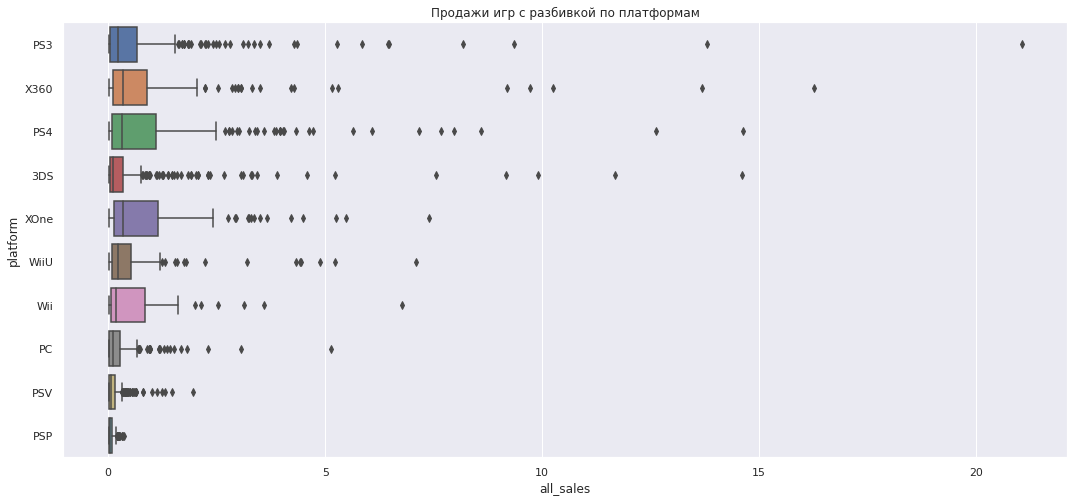

In [52]:
sns.boxplot(x='all_sales', y='platform', data=df_actual)
plt.title('Продажи игр с разбивкой по платформам')
plt.show;

Как видно из графика, снова платформы *PS4* и *XOne* среди лидеров по продажам, в тоже время и у некоторых других платформ встречаются отдельные игры, которые продавались очень хорошо, например, игры с продажами свыше 5 млн. копий имеются также на платформах *X360, PS3, 3DS, Wii, WiiU* и даже на *PC*. Пользователей платформ *PSV* и *PSP* видимо осталось уже совсем немного.

#### Определение влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграмм рассеяния и рассчет корреляции между отзывами и продажами.

Мы помним, что у нас во время предобработки данных были внесены определенные изменения в столбцах оценка критиков и оценка пользователей, в частности мы дали значение **-1** всем отсутствующим в этих колонках данным, а также значение **-2** в столбце оценок пользователей, где было указано значение `tbd`. Соответственно для чистоты картины случаи с внесенными таким образом изменениями мы рассматривать не будем. Также думаю будет неплохо взглянуть на 2 наиболее популярные и растущие платформы, а именно *XOne* и *PS4*.

Коэффициэнт корреляции Пирсона: 0.4593845680707106


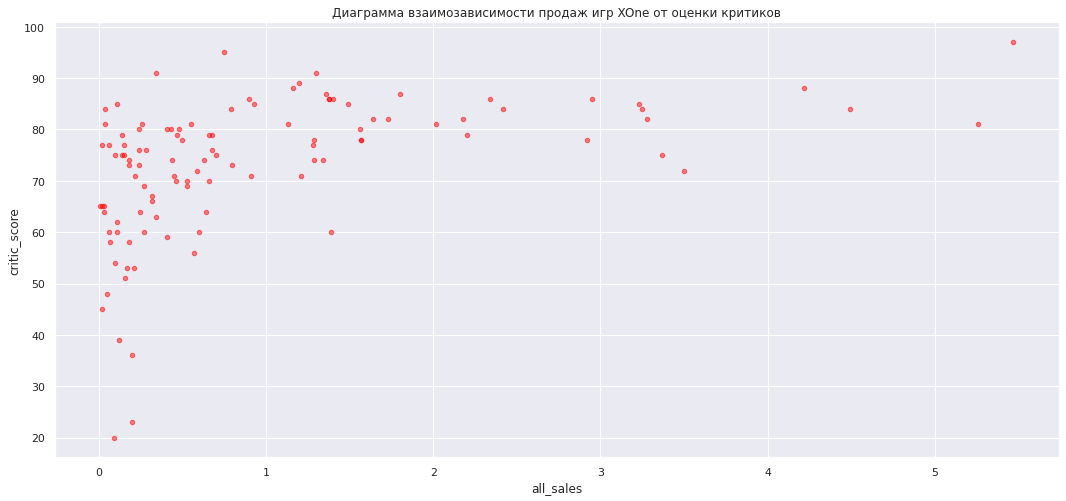

In [53]:
df_xone = df_actual.loc[(df_actual['platform'] == 'XOne') & (df_actual['critic_score'] >= 0)]
print('Коэффициэнт корреляции Пирсона:', df_xone['all_sales'].corr(df_xone['critic_score']))
df_xone.plot(kind='scatter', x='all_sales', y='critic_score', color='red', alpha=0.5, grid=True,\
        title='Диаграмма взаимозависимости продаж игр XOne от оценки критиков');

Коэффициэнт корреляции Пирсона: -0.03926828544552199


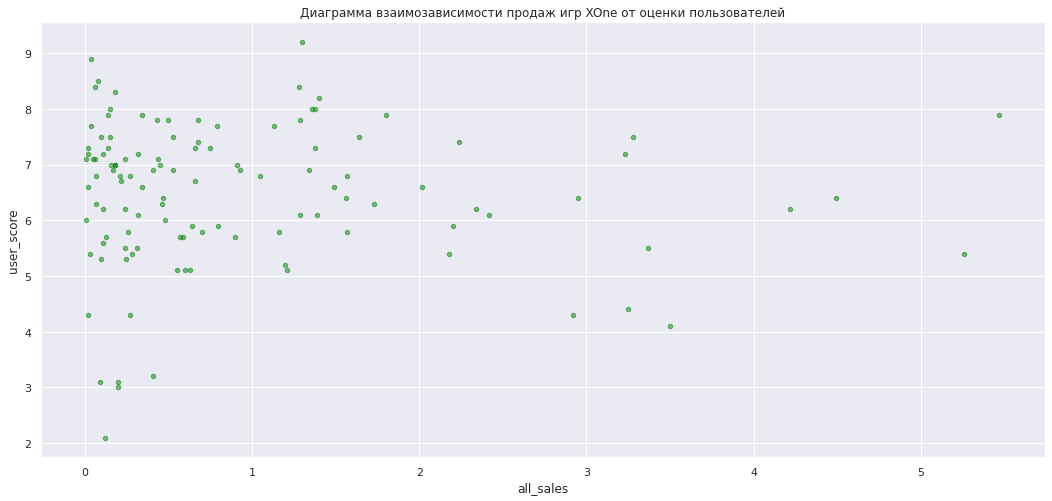

In [54]:
df_xone = df_actual.loc[(df_actual['platform'] == 'XOne') & (df_actual['user_score'] >= 0)]
print('Коэффициэнт корреляции Пирсона:', df_xone['all_sales'].corr(df_xone['user_score']))
df_xone.plot(kind='scatter', x='all_sales', y='user_score', color='green', alpha=0.5, grid=True,\
        title='Диаграмма взаимозависимости продаж игр XOne от оценки пользователей');

Коэффициэнт корреляции Пирсона: 0.4318482049982005


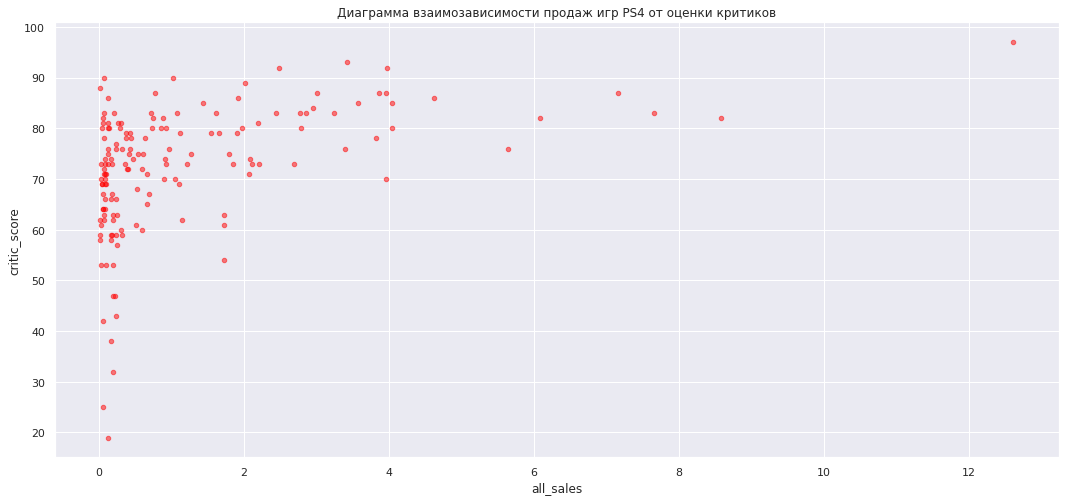

In [55]:
df_ps4 = df_actual.loc[(df_actual['platform'] == 'PS4') & (df_actual['critic_score'] >= 0)]
print('Коэффициэнт корреляции Пирсона:', df_ps4['all_sales'].corr(df_ps4['critic_score']))
df_ps4.plot(kind='scatter', x='all_sales', y='critic_score', color='red', alpha=0.5, grid=True,\
        title='Диаграмма взаимозависимости продаж игр PS4 от оценки критиков');

Коэффициэнт корреляции Пирсона: 0.024230832360622553


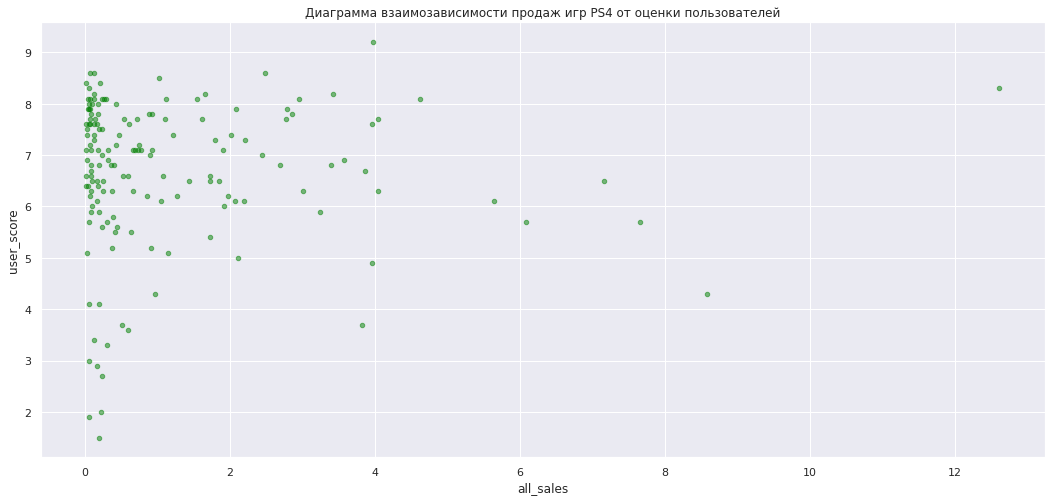

In [56]:
df_ps4 = df_actual.loc[(df_actual['platform'] == 'PS4') & (df_actual['user_score'] >= 0)]
print('Коэффициэнт корреляции Пирсона:', df_ps4['all_sales'].corr(df_ps4['user_score']))
df_ps4.plot(kind='scatter', x='all_sales', y='user_score', color='green', alpha=0.5, grid=True,\
        title='Диаграмма взаимозависимости продаж игр PS4 от оценки пользователей');

Как мы видим, в обоих случаях (как с *XOne*, так и с *PS4*) прослеживается средняя степень линейной зависимости между оценкой критиков и объемом продаж игр (коэффициент в районе 0.43-0.46), в то же время между оценкой пользователей и объемом продаж линейной зависимости практически не прослеживается. Это, вероятно, связано с разным характером и целями оценок критиков и пользователей. В то время как зачастую критикам доступна предварительная оценка игр (через бета-тестирования, предоставление для ознакомления до даты релиза и т.п.) в целях того, чтобы он оценил игру и дал свою оценку (предполагается, что разработчик расчитывает на высокую оценку), которая будет получена до официального старта продаж и, возможно, высокие оценки критиков будут способствовать росту продаж. В то же время большинство пользователей дают оценку игре уже после официального релиза и ее приобретения, при том, что в силу особенностей формирования оценки пользователей (это общее мнение большого количества пользователей) более менее окончательная оценка будет дана после участия в этом многих пользователей. Таким образом оценка пользователей гораздо в меньшей степени способна повлиять на объем продаж игры, если вообще способна на это (учитывая, что наибольшие продажи осуществляется в первое время после релиза, а во многих случаях вообще о релиза игры через предпродажи). В то же время и оценка критиков не всегда сама по себе способна оказать существенное влияние на объем продаж, поскольку на него влияют и другие факторы (реклама, маркетинг, наличие популярных прародителей игры, фан-сообщества и т.п.). 

#### Проверка предыдущих выводов с продажами игр на других платформах.

Коэффициэнт корреляции Пирсона: 0.2858320627120451


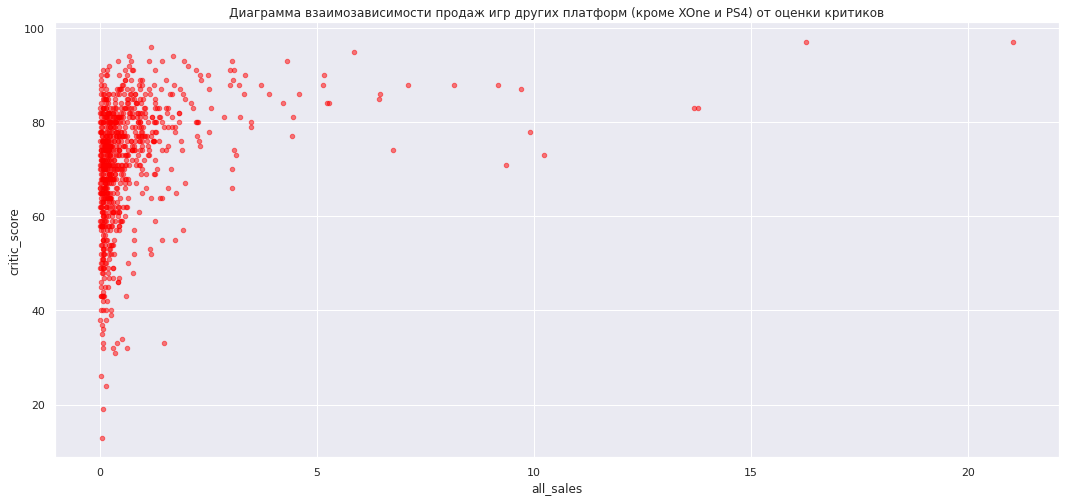

In [57]:
df_other = df_actual.loc[(df_actual['platform'] != 'XOne') & (df_actual['platform'] != 'PS4') & (df_actual['critic_score'] >= 0)]
print('Коэффициэнт корреляции Пирсона:', df_other['all_sales'].corr(df_other['critic_score']))
df_other.plot(kind='scatter', x='all_sales', y='critic_score', color='red', alpha=0.5, grid=True,\
        title='Диаграмма взаимозависимости продаж игр других платформ (кроме XOne и PS4) от оценки критиков');

Коэффициэнт корреляции Пирсона: 0.012643455068433312


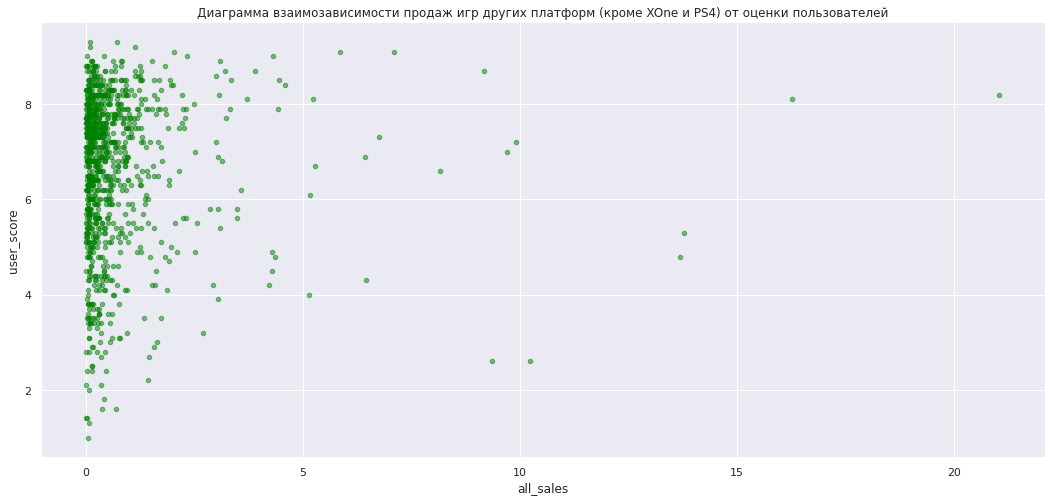

In [58]:
df_other = df_actual.loc[(df_actual['platform'] != 'XOne') & (df_actual['platform'] != 'PS4') & (df_actual['user_score'] >= 0)]
print('Коэффициэнт корреляции Пирсона:', df_other['all_sales'].corr(df_other['user_score']))
df_other.plot(kind='scatter', x='all_sales', y='user_score', color='green', alpha=0.5, grid=True,\
        title='Диаграмма взаимозависимости продаж игр других платформ (кроме XOne и PS4) от оценки пользователей');

Как мы видим, в случае с остальными играми также не прослеживается какой-либо серьезной корреляции между оценкой пользователей и объемом продаж. Влияние же оценки критиков в них еще меньше, чем на платформах *XOne* и *PS4*. Возможно это связано с большим разнообазием самих платформ, среди которых имеются любители именно конкретной платформы, выход игры на которой может сам по себе сздавать значительный стимул к ее приобретению, из-за чего соответственно уменьшается влияние критиков. 

#### Рассмотрение общего распределения игр по жанрам, выяснение возможности оценить самые прибыльные жанры, жанры с высокими и низкими продажами.

In [59]:
pivot_genre = df_actual.pivot_table(index='genre', columns='platform', values='all_sales', aggfunc='sum')
pivot_genre

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,
Action,40.74,13.09,115.66,81.25,4.02,14.46,11.98,17.27,82.09,32.91
Adventure,3.80,0.65,5.91,4.15,1.67,3.27,0.19,0.16,3.24,2.51
Fighting,8.43,0.07,10.85,5.91,0.36,2.09,NaN,5.26,4.97,2.08
Misc,8.95,0.73,8.66,7.59,0.65,4.11,17.68,11.69,14.79,7.35
Platform,18.81,0.08,4.15,5.53,NaN,2.26,2.25,21.31,2.04,0.65
Puzzle,2.66,0.03,0.04,0.02,NaN,0.05,0.66,1.32,NaN,NaN
Racing,0.28,1.11,11.56,10.95,NaN,2.21,0.01,7.87,8.41,8.31
Role-Playing,70.94,13.22,22.16,23.01,2.81,10.84,1.06,2.47,9.80,9.23
Shooter,0.13,12.37,60.37,64.37,NaN,2.34,NaN,5.64,72.67,48.64


In [60]:
pivot_genre2 = df_actual.pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum', 'mean'])\
        .reset_index().droplevel(1, axis=1)
pivot_genre2 = pivot_genre2.sort_values(by='sum', ascending=False)
pivot_genre2

,genre,count,sum,mean
0,Action,846,413.47,0.488735
8,Shooter,190,266.53,1.402789
7,Role-Playing,314,165.54,0.527197
10,Sports,218,157.47,0.722339
3,Misc,159,82.20,0.516981
4,Platform,68,57.08,0.839412
6,Racing,91,50.71,0.557253
2,Fighting,93,40.02,0.430323
9,Simulation,61,33.02,0.541311
1,Adventure,243,25.55,0.105144


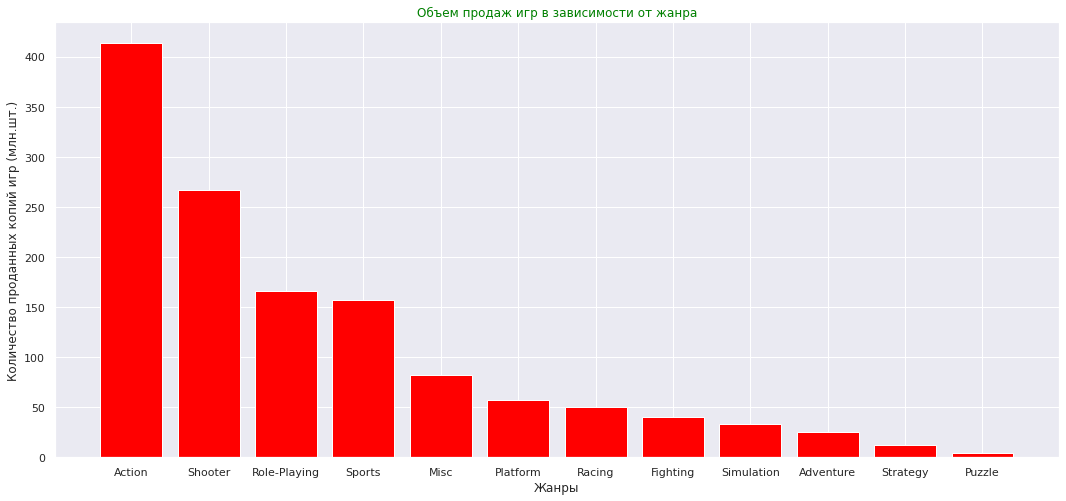

In [61]:
plt.bar(x=pivot_genre2['genre'], height=pivot_genre2['sum'], color=['red'])
plt.title('Объем продаж игр в зависимости от жанра', color='green')
plt.xlabel('Жанры')
plt.ylabel('Количество проданных копий игр (млн.шт.)')
plt.show;

Как видно из приведенной выше диаграммы, наибольшее количество продаж наблюдается у игр жанра *Action*, на втором месте жанр *Shooter*, наименьшими продажами характеризуются игры жанров *Puzzle* и *Strategy*. В тоже время однозначно выразится в данном случае нельзя, ведь из приведенной выше таблицы следует, что объемом 413 млн. копий разошлось 846 разных игр жанра *Action*, в то время как различных игр жанра *Shooter* было всего 190, а разошлись они тиражем в 266 млн. копий. Скорее по данному графику можно судить о степени потребности пользователей в играх того или иного жанра, объеме целевой аудитории жанра.

Давайте вглянем на другую диаграмму. 

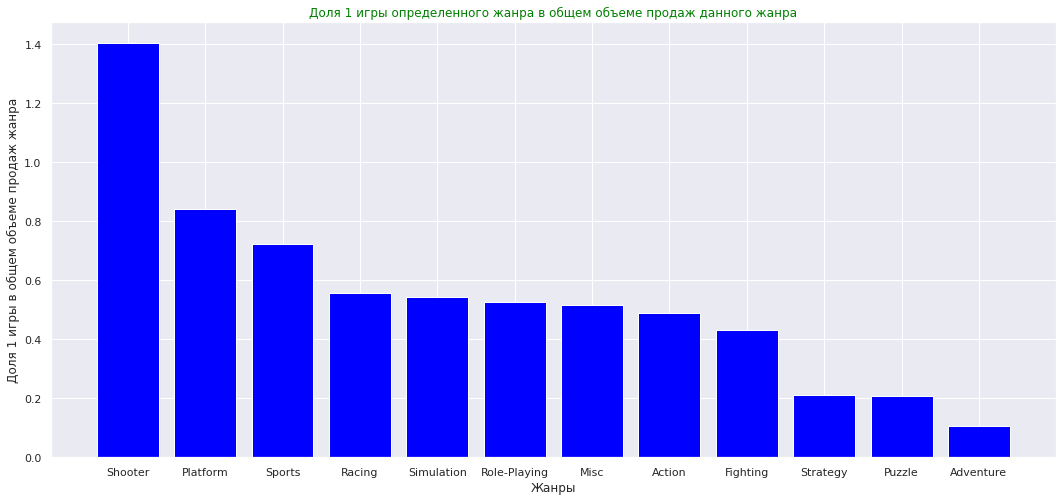

In [62]:
pivot_genre2 = pivot_genre2.sort_values(by='mean', ascending=False)
plt.bar(x=pivot_genre2['genre'], height=pivot_genre2['mean'], color=['blue'])
plt.title('Доля 1 игры определенного жанра в общем объеме продаж данного жанра', color='green')
plt.xlabel('Жанры')
plt.ylabel('Доля 1 игры в общем объеме продаж жанра')
plt.show;

Как видно картина сильно изменилось и в качестве лидера в данном случае выступает игра жанра *Shooter*, а в качестве аутсайдера игра жанра *Adventure*. В данном случае можно предполагать, что игры такого жанра имеют относительно высокий или низкий уровень продаж. В то же время и по этому графику (как и по предыдущему) ничего нельзя сказать о том, является ли тот или иной жанр прибыльным или нет. Для решения этого вопроса необходимо также учитывать и другие характеристики (например, время и стоимость разработки игры конкретного жанра, стоимость реализации копии игры и т.п.), а на основе имеющихся во фрейме данных это сделать крайне проблематично.

**Вывод:** 
В ходе исследовательского анализа мы просмотрели количество релизов игр по годам, а также то, как менялись продажи по платформам. В частности установлено, что за период с 1980 по 2016 гг. платформой с самым большим количеством продаваемых игр оказалась *PS2*, для которой было продано свыше 1,2 миллиарда копий игр. В то же время платформы недолговечны (за исключением разве что платформы PC в силу ее особенностей), средний срок жизни платформы оставляет примерно 7,7 лет, после чего в силу устаревания платформы, для нее пересают выпускаться новые игры. 

В то же время мы установили, что в силу каких-то причин, количество продаж в зависимости от года, изменялось, в связи с чем было принято решение о дальнейшей работе в целях планирования компании на следующий год (по условию 2017) только с актуальными данными, поскольку устаревшие данные лишь внесут искажения в виводы в силу их несоответствия требованиям времени. Также было принято решение оказаться от использования данных за 2016 год в силу их неполноты, в связи с чем невозможно предсказать, каким образом это может отразиться на выводах. Таким обазом, актуальными данными было решено считать сведения за 2012-2015 гг. 

В ходе анализа установлено, что рост продаж игр показывают две платформы *PS4* и *XOne*, которые пришли на смену показывающих существенный спад продаж с момента их появления соотвественно *PS3* и *X360*. Все остальные платформы показывают небольшой спад. В то же время и у некоторых других платформ встречаются отдельные игры, которые также продавались очень хорошо, например, игры с продажами свыше 5 млн. копий имеются также на платформах *X360, PS3, 3DS, Wii, WiiU* и даже на *PC*.   

При анализе степени корреляции продаж с оценками критиков и пользователей на примере платформ *XOne* и *PS4*, прослеживается средняя степень линейной зависимости между оценкой критиков и объемом продаж игр (коэффициент в районе 0.43-0.46), в то же время между оценкой пользователей и объемом продаж линейной зависимости практически не прослеживается. Это, вероятно, связано с разным характером и целями оценок критиков и пользователей. В то время как зачастую критикам доступна предварительная оценка игр (через бета-тестирования, предоставление для ознакомления до даты релиза и т.п.) в целях того, чтобы он оценил игру и дал свою оценку (предполагается, что разработчик расчитывает на высокую оценку), которая будет получена до официального старта продаж и, возможно, высокие оценки критиков будут способствовать росту продаж. В то же время большинство пользователей дают оценку игре уже после официального релиза и ее приобретения, при том, что в силу особенностей формирования оценки пользователей (это общее мнение большого количества пользователей) более менее окончательная оценка будет дана после участия в этом многих пользователей. Таким образом оценка пользователей гораздо в меньшей степени либо вообще не способна повлиять на объем продаж игры. В то же время и оценка критиков не всегда сама по себе способна оказать существенное влияние на объем продаж, поскольку на него влияют и другие факторы (реклама, маркетинг, наличие популярных прародителей игры, фан-сообщества и т.п.). Влияние же оценки критиков на других платформах еще меньше, чем на платформах *XOne* и *PS4*. Возможно это связано с большим разнообазием самих платформ, среди которых имеются любители именно конкретной платформы, выход игры на которой может сам по себе создает значительный стимул к ее приобретению, из-за чего соответственно уменьшается влияние критиков.

В ходе анализа игровых жанров в свете количества их продаж установлено, что наибольшее количество продаж наблюдается у игр жанра *Action*, на втором месте жанра *Shooter*, наименьшими продажами характеризуются игры жанра *Puzzle* и *Strategy*. В тоже время однозначно выразится в данном случае нельзя, ведь из анализа следует, что объемом 413 млн. копий разошлось 846 разных игр жанра *Action*, в то время как различных игр жанра *Shooter* было всего 190, а разошлись они тиражем в 266 млн. копий. В целом данные показывают степень потребности пользователей в играх того или иного жанра и объем целевой аудитории жанра.

### Изучение портрета пользователя каждого региона.

#### Самые популярные платформы (топ-5).

Поскольку нам придется выполять однотипные действия для различных регионов, для упрощения процесса сначала объявим функцию.

In [63]:
def region_platform (region):
    platform = df_actual.groupby('platform')[region].sum().sort_values(ascending=False)
    platform.index = platform.index.where(platform.index.isin(platform.head().index), 'other')
    other = pd.Series([platform[platform.index == 'other'].sum()], index=['other'])
    platform = platform[platform.index != 'other']
    platform = pd.concat([platform, other], axis=0)
    return platform

Теперь определим, какие платформы в различных регионах являются наиболее популярными и посмотрим, какие доли они занимают в каждом регионе (популярность платформ будем определять по количеству продаж копий игр на данной платформе, свои действия продолжаем осуществлять на актуальных и объективных данных).

In [64]:
platform_na = region_platform('na_sales')
platform_eu = region_platform('eu_sales')
platform_jp = region_platform('jp_sales')
platform_other = region_platform('other_sales')

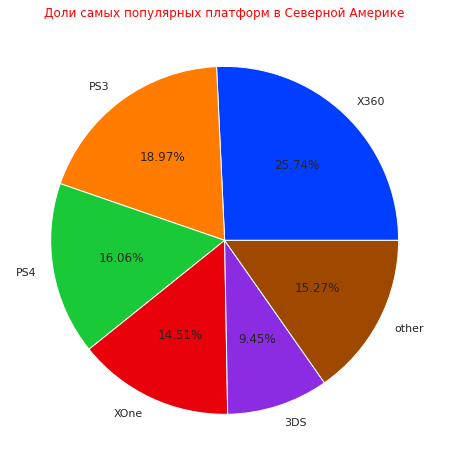

In [65]:
colors = sns.color_palette('bright')[0:6]
plt.title('Доли самых популярных платформ в Северной Америке', color='red')
plt.pie(platform_na, labels=platform_na.index, colors=colors, autopct='%.2f%%');

Как видно из графика, самой популярной платформой в Северной Америке является *X360* и занимает 25,74% рынка, за ней следуют *PS3* с 18,97%, *PS4* с 16,06%, *XOne* с 14,51% и *3DS* с 9,45% рынка. Остальные платформы занимают 15,27% рынка. Две мощные и конкурирующе линейки платформ *Xbox* и *Playstation* занимают таким образом 40,25% и 35,03% рынка соответственно, что для данного региона вполне естественно, так как *Xbox* это американский производитель. 

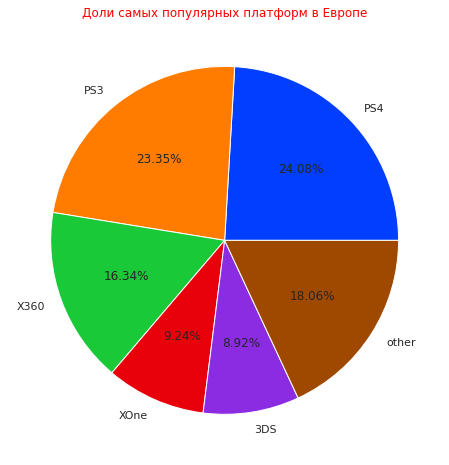

In [66]:
colors = sns.color_palette('bright')[0:6]
plt.title('Доли самых популярных платформ в Европе', color='red')
plt.pie(platform_eu, labels=platform_eu.index, colors=colors, autopct='%.2f%%');

Как видно из графика, самой популярной платформой в Европе является *PS4* и занимает 24,08% рынка, за ней следуют *PS3* с 23,35%, *X360* с 16,34%, *XOne* с 9,24% и *3DS* с 8,92% рынка. Остальные платформы занимают 18,06% рынка. Линейки платформ *Xbox* и *Playstation* занимают таким образом 25,58% и 47,43% рынка соответственно, как мы видим в Европе японская компания Sony почти в 2 раза опережает американский *Xbox* по популярности.

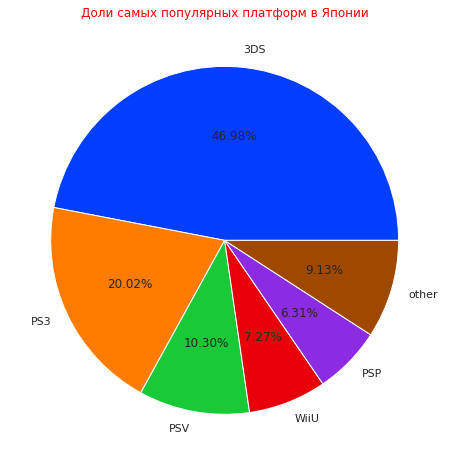

In [67]:
colors = sns.color_palette('bright')[0:6]
plt.title('Доли самых популярных платформ в Японии', color='red')
plt.pie(platform_jp, labels=platform_jp.index, colors=colors, autopct='%.2f%%');

Интересно, что самой популярной платформой в Японии является *3DS* и занимает 46,98% рынка (почти половину), за ней следуют *PS3* с 20,02%, *PSV* с 10,3%, *WiiU* с 7,27% и *PSP* с 6,31% рынка. Остальные платформы занимают 9,13% рынка. Почти вся доля рынка занята японскими произвоителями, это Nintendo 3DS и компания Sony. При этом платформы Xbox вообще нет в пятерке лидирующих. Для интереса, можн взглянуть на показатели продаж XOne и X360 в Японии.

In [68]:
df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

platform
3DS     79.76
PS3     33.99
PSV     17.48
WiiU    12.34
PSP     10.71
PS4     10.22
Wii      3.39
X360     1.57
XOne     0.33
PC       0.00
Name: jp_sales, dtype: float64

Да, как видно из данных у производителя линейки Xbox совсем всё плохо на рынке игр Японии, суммарно они занимают лишь 1,9% этого рынка.

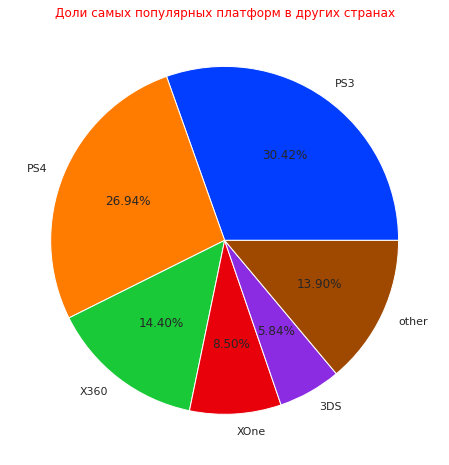

In [69]:
colors = sns.color_palette('bright')[0:6]
plt.title('Доли самых популярных платформ в других странах', color='red')
plt.pie(platform_other, labels=platform_other.index, colors=colors, autopct='%.2f%%');

Как видно из графика, самой популярной платформой в иных странах в совокупности является *PS3* и занимает 30,42% рынка, за ней следуют *PS4* с 26,94%, *X360* с 14,4%, *XOne* с 8,5% и *3DS* с 5,84% рынка. Остальные платформы занимают 13,9% рынка. Линейки платформ *Xbox* и *Playstation* занимают таким образом 22,9% и 57,36% соответственно, как мы видим в этих странах японская компания *Sony* более чем в 2 раза опережает американский *Xbox* по популярности. В целом статистка по другим странам похожа на статистику Европы, хотя видно, что в европейских странах консоль *Playstation* обновляется несколько быстрее. Также, можно сказать, что компания *Sony* существенно опережает производителя линейки Xbox по количеству продаваемых копий игр, за исключением рынка Северной Америки, который в свою очередь является самым большим.

#### Самые популярные жанры (топ-5).

Для начала также объявим функцию, с ее помощью рассчитаем топ-5 самых популярных жанров игр в каждом регионе и посмотрим на распределение долей в круговых диаграммах. Популярность игр по жанрам также будем рассчитывать из количества копий продаж игры.

In [70]:
def region_genre (region):
    genre = df_actual.groupby('genre')[region].sum().sort_values(ascending=False)
    genre.index = genre.index.where(genre.index.isin(genre.head().index), 'other')
    other = pd.Series([genre[genre.index == 'other'].sum()], index=['other'])
    genre = genre[genre.index != 'other']
    genre = pd.concat([genre, other], axis=0)
    return genre

In [71]:
genre_na = region_genre('na_sales')
genre_eu = region_genre('eu_sales')
genre_jp = region_genre('jp_sales')
genre_other = region_genre('other_sales')

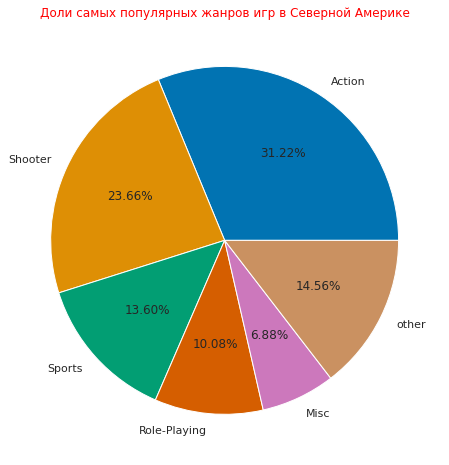

In [72]:
colors = sns.color_palette('colorblind')[0:6]
plt.title('Доли самых популярных жанров игр в Северной Америке', color='red')
plt.pie(genre_na, labels=genre_na.index, colors=colors, autopct='%.2f%%');

В Северной Америке самыми популярными жанрами являтся игры экшн (31,22%), шутеры (23,66%), спортивные (13,6%), ролевые (10,08%) и жанра misk (6,88%). На остальные игровые жанры осталось лишь 14,56% рынка.

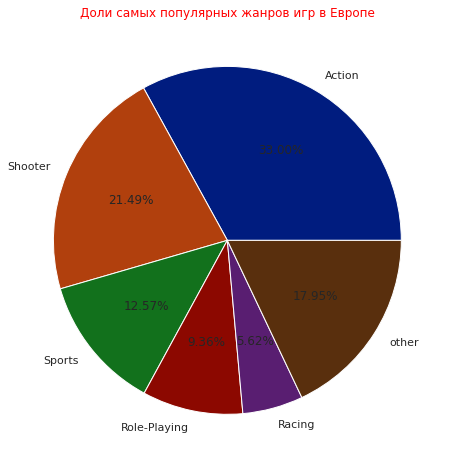

In [73]:
colors = sns.color_palette('dark')[0:6]
plt.title('Доли самых популярных жанров игр в Европе', color='red')
plt.pie(genre_eu, labels=genre_eu.index, colors=colors, autopct='%.2f%%');

В Европе ситуация похожа с Северной Америкой, здесь самыми популярными жанрами являтся игры экшн (33%), шутеры (21,49%), спортивные (12,57%), ролевые (9,36%) и лишь на пятое место, в отличии от предыдуего региона, вышли гоночные игры (6,88%). На остальные игровые жанры осталось 17,95% рынка.

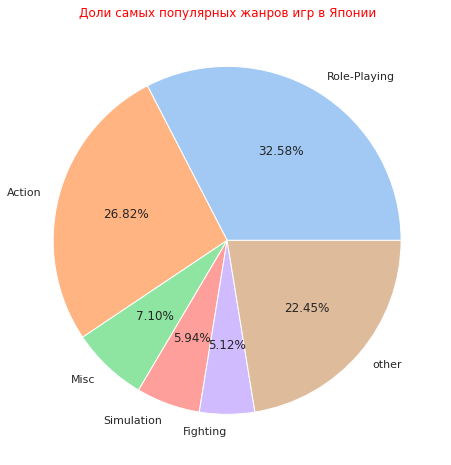

In [74]:
colors = sns.color_palette('pastel')[0:6]
plt.title('Доли самых популярных жанров игр в Японии', color='red')
plt.pie(genre_jp, labels=genre_jp.index, colors=colors, autopct='%.2f%%');

Ситуация по жанрам в Японии выглядит значительно по другому. Топ-5 жанров здесь распределеились следующим образом - ролевые (32,58%), экшн (26,82%), Misc (7,1%), симуляторы (5,94%), драки (5,12%). На остальные игровые жанры осталось 22,45% рынка. Вероятно в случае Японии значительную роль в несколько иной популярности игровых жанров сыграли менталитет и психология жителей Японии. 

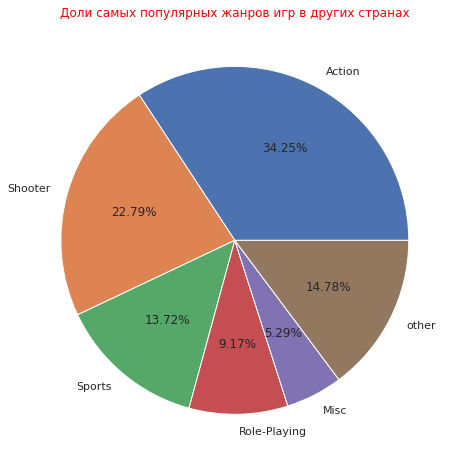

In [75]:
colors = sns.color_palette('deep')[0:6]
plt.title('Доли самых популярных жанров игр в других странах', color='red')
plt.pie(genre_other, labels=genre_other.index, colors=colors, autopct='%.2f%%');

В иных странах рейтинги жанров игр распределились как и в Северной Америке, здесь самыми популярными жанрами являтся игры экшн (34,25%), шутеры (22,679%), спортивные (13,72%), ролевые (9,17%) и жанра misk (5,29%). На остальные игровые жанры осталось лишь 14,78% рынка.  

#### Определение влияния рейтинга ESRB на продажи в отдельном регионе.

Перед анализом по различным регионам давайте предварительно взглянем на общую картину по миру.

In [76]:
print('Общее количество игр:', df_actual['rating'].isna().count())
print('Kоличество игр без рейтинга ESRB:', df_actual['rating'].isna().sum())
print(f'Процент игр без рейтинга: {df_actual["rating"].isna().mean():.2%}')
print('Количество проданных копий игр (млн. шт.):', df_actual['all_sales'].sum())
games_norating = df_actual[df_actual['rating'].isna()]
games_norating_share = games_norating['all_sales'].sum()/df_actual['all_sales'].sum()
print(f'Процент продаж игр без рейтинга: {games_norating_share:.2%}')

Общее количество игр: 2364
Kоличество игр без рейтинга ESRB: 1038
Процент игр без рейтинга: 43.91%
Количество проданных копий игр (млн. шт.): 1308.5800000000002
Процент продаж игр без рейтинга: 22.11%


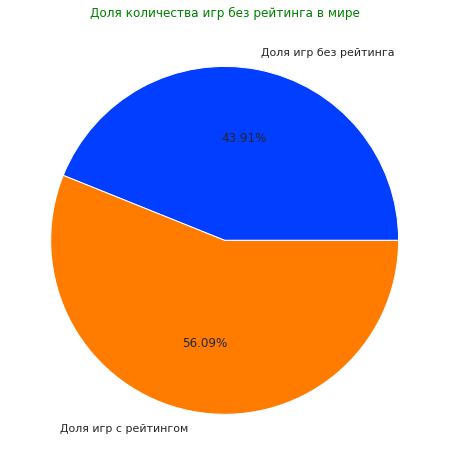

In [77]:
all_games = [df_actual["rating"].isna().mean(), 1 - df_actual["rating"].isna().mean()]
name_for_diagramme = ['Доля игр без рейтинга', 'Доля игр с рейтингом']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля количества игр без рейтинга в мире', c='green')
plt.pie(all_games, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

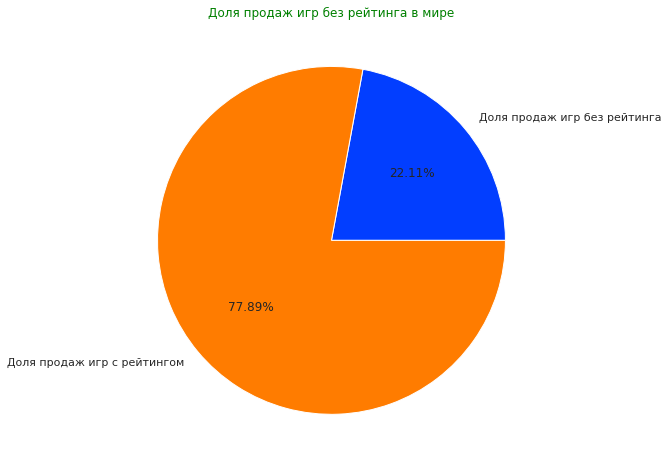

In [78]:
all_games_sale = [games_norating_share, 1 - games_norating_share]
name_for_diagramme = ['Доля продаж игр без рейтинга', 'Доля продаж игр с рейтингом']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля продаж игр без рейтинга в мире', c='green')
plt.pie(all_games_sale, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

Как мы видим, в актуальной части данных имеются сведения о 2364 играх, у которых в 1038 случаях отсутствовал рейтинг ESRB, то есть у 43,91% игр. При этом доля продаж копий таких игр существенно ниже и составляет 22,11%. Давайте посмотрим как обстоит дело с играми, которые продавались в Северной Америке. 

In [79]:
games_na = df_actual.loc[df['na_sales'] != 0]
print('Общее количество игр:', games_na['rating'].isna().count())
print('Kоличество игр без рейтинга ESRB:', games_na['rating'].isna().sum())
print(f'Процент игр без рейтинга: {games_na["rating"].isna().mean():.2%}')
print('Количество проданных копий игр (млн. шт.):', games_na['na_sales'].sum())
games_na_norating = games_na[games_na['rating'].isna()]
games_na_norating_share = games_na_norating['na_sales'].sum()/games_na['na_sales'].sum()
print(f'Процент продаж игр без рейтинга: {games_na_norating_share:.2%}')

Общее количество игр: 1393
Kоличество игр без рейтинга ESRB: 298
Процент игр без рейтинга: 21.39%
Количество проданных копий игр (млн. шт.): 543.38
Процент продаж игр без рейтинга: 16.86%


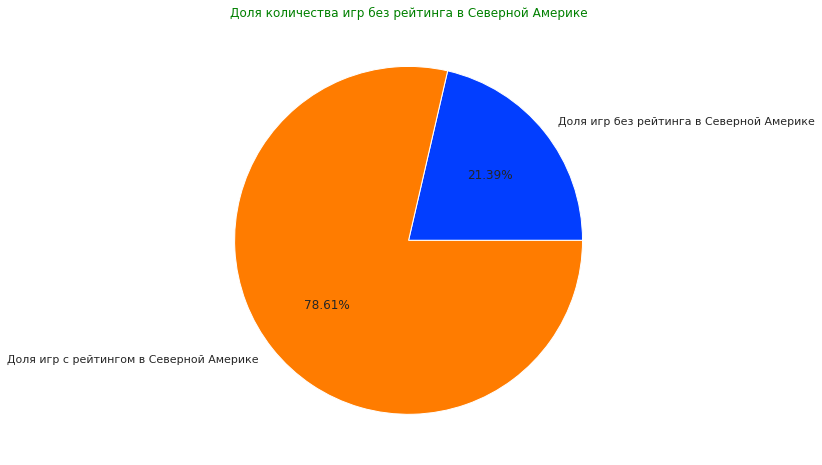

In [80]:
na_games = [games_na["rating"].isna().mean(), 1 - games_na["rating"].isna().mean()]
name_for_diagramme = ['Доля игр без рейтинга в Северной Америке', 'Доля игр с рейтингом в Северной Америке']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля количества игр без рейтинга в Северной Америке', c='green')
plt.pie(na_games, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

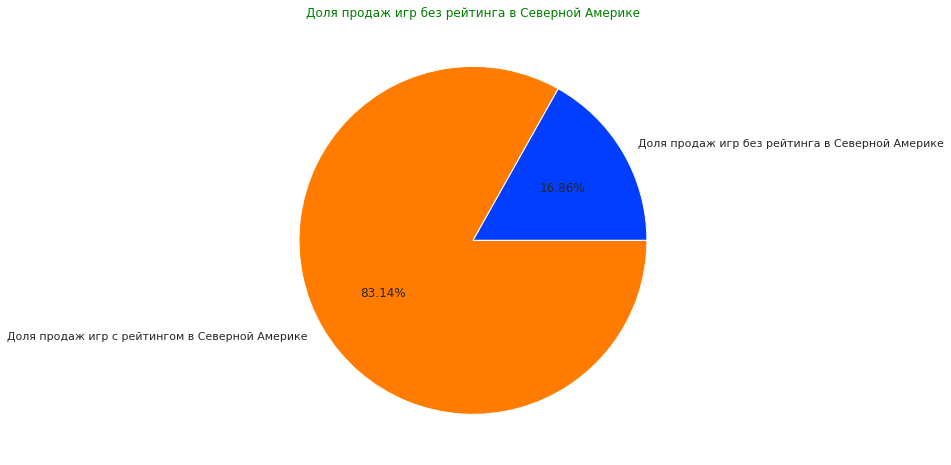

In [81]:
na_games_sale = [games_na_norating_share, 1 - games_na_norating_share]
name_for_diagramme = ['Доля продаж игр без рейтинга в Северной Америке', 'Доля продаж игр с рейтингом в Северной Америке']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля продаж игр без рейтинга в Северной Америке', c='green')
plt.pie(na_games_sale, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

Для Северной Америки имеются сведения о 1393 играх, у которых в 298 случаях отсутствовал рейтинг ESRB, то есть у 21,39% игр. При этом доля продаж копий таких игр ниже и составляет 16,86%. Давайте посмотрим как обстоит дело с играми, которые продавались в Европе.

In [82]:
games_eu = df_actual.loc[df['eu_sales'] != 0]
print('Общее количество игр:', games_eu['rating'].isna().count())
print('Kоличество игр без рейтинга ESRB:', games_eu['rating'].isna().sum())
print(f'Процент игр без рейтинга: {games_eu["rating"].isna().mean():.2%}')
print('Количество проданных копий игр (млн. шт.):', games_eu['eu_sales'].sum())
games_eu_norating = games_eu[games_eu['rating'].isna()]
games_eu_norating_share = games_eu_norating['eu_sales'].sum()/games_eu['eu_sales'].sum()
print(f'Процент продаж игр без рейтинга: {games_eu_norating_share:.2%}')

Общее количество игр: 1512
Kоличество игр без рейтинга ESRB: 345
Процент игр без рейтинга: 22.82%
Количество проданных копий игр (млн. шт.): 453.92999999999995
Процент продаж игр без рейтинга: 18.03%


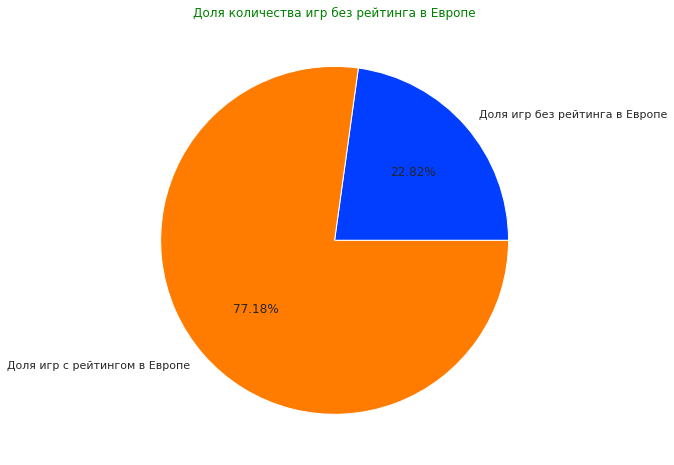

In [83]:
eu_games = [games_eu["rating"].isna().mean(), 1 - games_eu["rating"].isna().mean()]
name_for_diagramme = ['Доля игр без рейтинга в Европе', 'Доля игр с рейтингом в Европе']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля количества игр без рейтинга в Европе', c='green')
plt.pie(eu_games, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

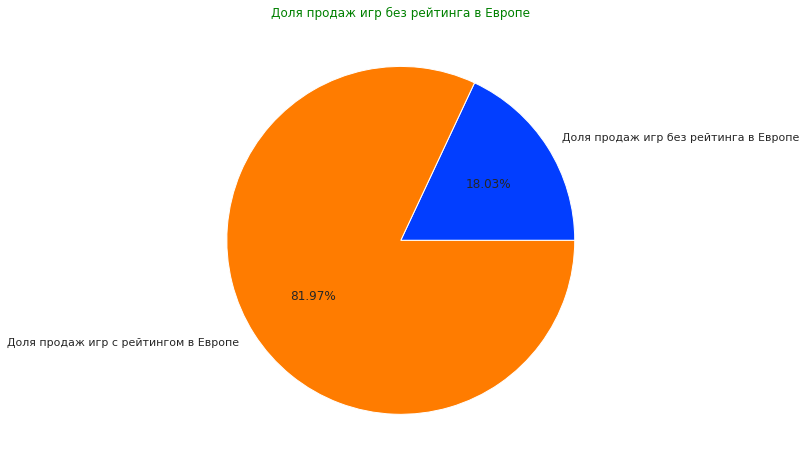

In [84]:
eu_games_sale = [games_eu_norating_share, 1 - games_eu_norating_share]
name_for_diagramme = ['Доля продаж игр без рейтинга в Европе', 'Доля продаж игр с рейтингом в Европе']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля продаж игр без рейтинга в Европе', c='green')
plt.pie(eu_games_sale, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

Для Европы имеются сведения о 1512 играх, у которых в 345 случаях отсутствовал рейтинг ESRB, то есть у 22,82% игр. При этом доля продаж копий таких игр ниже и составляет 18,3%. Ситуация в целом похожая на сложившуся в Северной Америке. Давайте посмотрим как обстоит дело с играми, которые продавались в Японии.

In [85]:
games_jp = df_actual.loc[df['jp_sales'] != 0]
print('Общее количество игр:', games_jp['rating'].isna().count())
print('Kоличество игр без рейтинга ESRB:', games_jp['rating'].isna().sum())
print(f'Процент игр без рейтинга: {games_jp["rating"].isna().mean():.2%}')
print('Количество проданных копий игр (млн. шт.):', games_jp['jp_sales'].sum())
games_jp_norating = games_jp[games_jp['rating'].isna()]
games_jp_norating_share = games_jp_norating['jp_sales'].sum()/games_jp['jp_sales'].sum()
print(f'Процент продаж игр без рейтинга: {games_jp_norating_share:.2%}')

Общее количество игр: 1327
Kоличество игр без рейтинга ESRB: 774
Процент игр без рейтинга: 58.33%
Количество проданных копий игр (млн. шт.): 169.79
Процент продаж игр без рейтинга: 53.84%


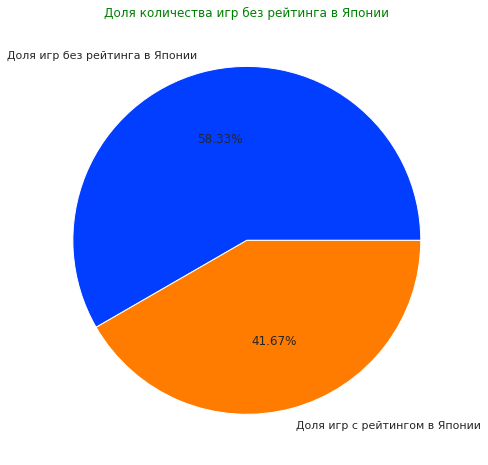

In [86]:
jp_games = [games_jp["rating"].isna().mean(), 1 - games_jp["rating"].isna().mean()]
name_for_diagramme = ['Доля игр без рейтинга в Японии', 'Доля игр с рейтингом в Японии']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля количества игр без рейтинга в Японии', c='green')
plt.pie(jp_games, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

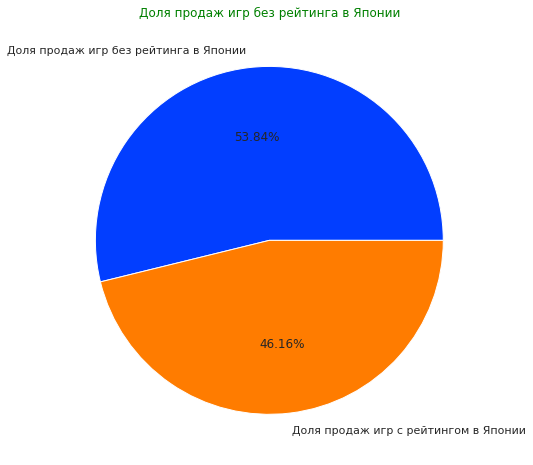

In [87]:
jp_games_sale = [games_jp_norating_share, 1 - games_jp_norating_share]
name_for_diagramme = ['Доля продаж игр без рейтинга в Японии', 'Доля продаж игр с рейтингом в Японии']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля продаж игр без рейтинга в Японии', c='green')
plt.pie(jp_games_sale, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

Для Японии имеются сведения о 1327 играх, у которых в 774 случаях отсутствовал рейтинг ESRB, то есть у 58,33% игр. При этом доля продаж копий таких игр несколько ниже и составляет 53,84%. Действительно, ситуация в Японии отличается от предыущих регионов, поскольку, вероятно, производители здесь не делают акцент на получении рейтинга (имеется ввиду именно рейтинг ESRB) на выходящие игры, в то же время игры с рейтингом всё же продаются лучше. Давайте посмотрим как обстоит дело с играми, которые продавались в остальных странах мира.

In [88]:
games_other = df_actual.loc[df['other_sales'] != 0]
print('Общее количество игр:', games_other['rating'].isna().count())
print('Kоличество игр без рейтинга ESRB:', games_other['rating'].isna().sum())
print(f'Процент игр без рейтинга: {games_other["rating"].isna().mean():.2%}')
print('Количество проданных копий игр (млн. шт.):', games_other['other_sales'].sum())
games_other_norating = games_other[games_other['rating'].isna()]
games_other_norating_share = games_other_norating['other_sales'].sum()/games_other['other_sales'].sum()
print(f'Процент продаж игр без рейтинга: {games_other_norating_share:.2%}')

Общее количество игр: 1393
Kоличество игр без рейтинга ESRB: 292
Процент игр без рейтинга: 20.96%
Количество проданных копий игр (млн. шт.): 141.48
Процент продаж игр без рейтинга: 17.26%


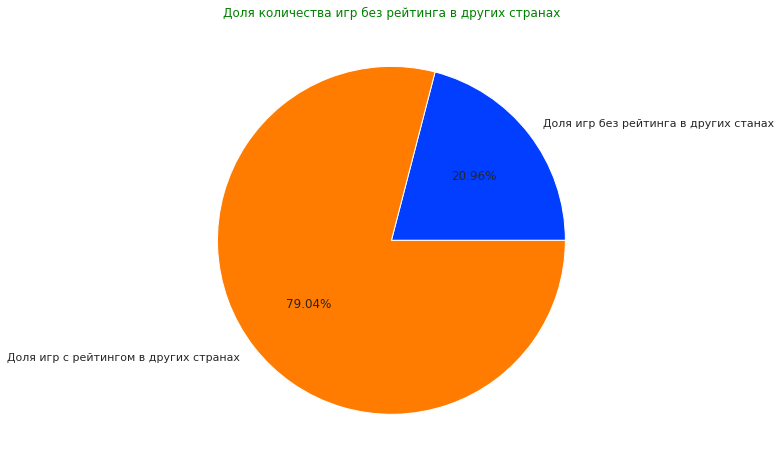

In [89]:
other_games = [games_other["rating"].isna().mean(), 1 - games_other["rating"].isna().mean()]
name_for_diagramme = ['Доля игр без рейтинга в других станах', 'Доля игр с рейтингом в других странах']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля количества игр без рейтинга в других странах', c='green')
plt.pie(other_games, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

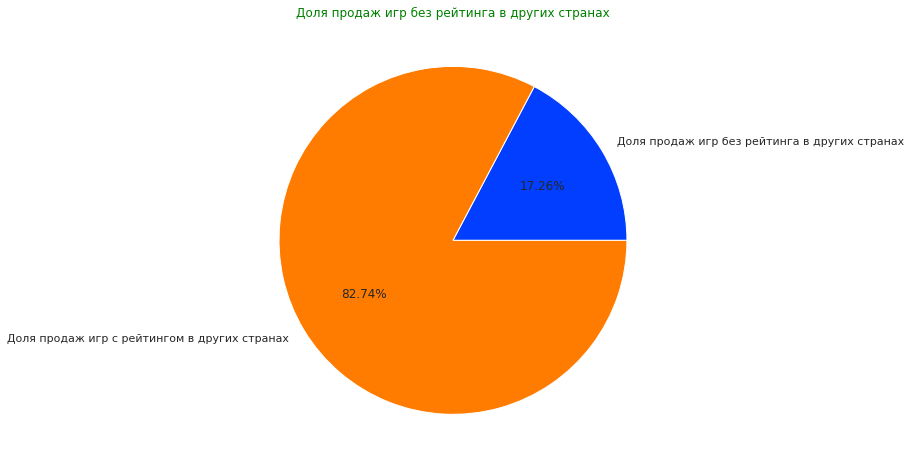

In [90]:
other_games_sale = [games_other_norating_share, 1 - games_other_norating_share]
name_for_diagramme = ['Доля продаж игр без рейтинга в других странах', 'Доля продаж игр с рейтингом в других странах']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля продаж игр без рейтинга в других странах', c='green')
plt.pie(other_games_sale, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

Для остальных стран мира имеются сведения о 1393 играх, у которых в 292 случаях отсутствовал рейтинг ESRB, то есть у 20,96% игр. При этом доля продаж копий таких игр ниже и составляет 17,26%. 

С учетом того, что ситуация в Японии значительно отличается от ситуации в остальном мире, взгляем, какое количество игр продавалось только исключително в конкретном регионе.

In [91]:
games_na_only = df_actual.loc[df['all_sales'] - df['na_sales'] == 0]
print('Общее количество игр продаваемых только в Северной Америке:', games_na_only['rating'].isna().count())
games_eu_only = df_actual.loc[df['all_sales'] - df['eu_sales'] == 0]
print('Общее количество игр продаваемых только в Европе:', games_eu_only['rating'].isna().count())
games_jp_only = df_actual.loc[df['all_sales'] - df['jp_sales'] == 0]
print('Общее количество игр продаваемых только в Японии:', games_jp_only['rating'].isna().count())
games_other_only = df_actual.loc[df['all_sales'] - df['other_sales'] == 0]
print('Общее количество игр продаваемых только в других странах мира:', games_other_only['rating'].isna().count())

Общее количество игр продаваемых только в Северной Америке: 41
Общее количество игр продаваемых только в Европе: 163
Общее количество игр продаваемых только в Японии: 705
Общее количество игр продаваемых только в других странах мира: 0


Как мы видим, серьезную группу составляют только игры, продаваемые исключтельно в Японии. Есть небольшое количество игр, ориентированных на продажу только в Северной Америке или Европе, спецально только для других стран игры вообще не издаются. Давайте теперь взглянем на ситуацию для игр, продаваемых только в Японии.  

In [92]:
games_jp_only = df_actual.loc[df['all_sales'] - df['jp_sales'] == 0]
print('Общее количество игр:', games_jp_only['rating'].isna().count())
print('Kоличество игр без рейтинга ESRB:', games_jp_only['rating'].isna().sum())
print(f'Процент игр без рейтинга: {games_jp_only["rating"].isna().mean():.2%}')
print('Количество проданных копий игр (млн. шт.):', games_jp_only['jp_sales'].sum())
games_jp_only_norating = games_jp_only[games_jp_only['rating'].isna()]
games_jp_only_norating_share = games_jp_only_norating['jp_sales'].sum()/games_jp_only['jp_sales'].sum()
print(f'Процент продаж игр без рейтинга: {games_jp_only_norating_share:.2%}')

Общее количество игр: 705
Kоличество игр без рейтинга ESRB: 647
Процент игр без рейтинга: 91.77%
Количество проданных копий игр (млн. шт.): 64.86000000000001
Процент продаж игр без рейтинга: 89.36%


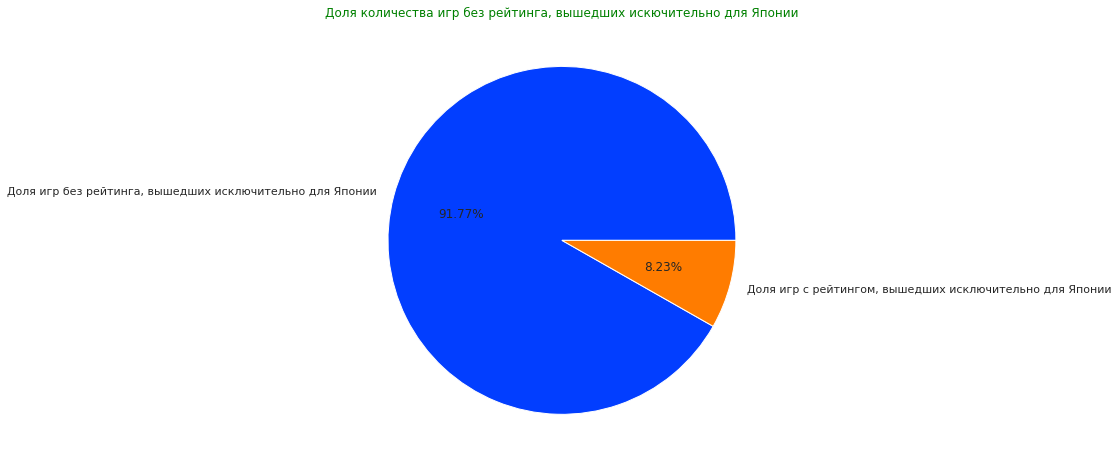

In [93]:
jp_only_games = [games_jp_only["rating"].isna().mean(), 1 - games_jp_only["rating"].isna().mean()]
name_for_diagramme = ['Доля игр без рейтинга, вышедших исключительно для Японии'
                      , 'Доля игр с рейтингом, вышедших исключительно для Японии']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля количества игр без рейтинга, вышедших искючительно для Японии', c='green')
plt.pie(jp_only_games, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

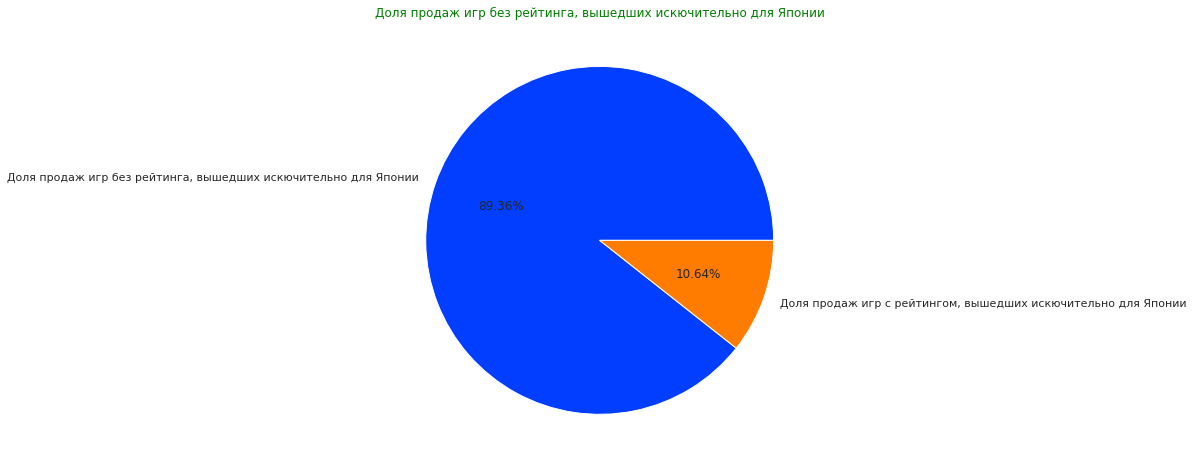

In [94]:
jp_only_games_sale = [games_jp_only_norating_share, 1 - games_jp_only_norating_share]
name_for_diagramme = ['Доля продаж игр без рейтинга, вышедших искючительно для Японии'
                      , 'Доля продаж игр с рейтингом, вышедших искючительно для Японии']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля продаж игр без рейтинга, вышедших искючительно для Японии', c='green')
plt.pie(jp_only_games_sale, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

Исключительно в Японии было продано 705 игр, у которых в 647 случаях отсутствовал рейтинг ESRB, то есть у 91,77% игр. При этом доля продаж копий таких игр несколько ниже и составляет 89,36%. 

Из проведенного анализа можно сделать вывод, что определенной спецификой обладают только игры, продаваемые в Японии, что видимо связано с определенным менталитетом японцев. Для остальных стран игры в целом продаются равномерно, при этом в большинстве случаев издатели получают рейтинг ESRB для своих игр, который выдается ассоциацией в Северной Америке. Как мы видим, большинство игр стараются охватить серьезный и объемный в игровой индустрии рынок Северной Америки. В то же время ввиду особенностей японской игровой индустрии, исключительно для данного региона во многих случаях выпускается большое количество игр, которые не утруждаются получением рейтинга ESRB, поскольку в Японии имеется некоммерческая организация по присвоению рейтинга играм - CERO, сведений о данном рейтинге во фрейме данных нет.    

Сначала избавимся от пропусков в значениях колонки `'rating'`, поскольку данные по данным случаям не дадут нам никакой картины

In [95]:
df_actual_rating = df_actual.dropna(subset=['rating'])

In [96]:
def region_rating (region):
    rating = df_actual_rating.groupby('rating')[region].sum().sort_values(ascending=False)
    rating.index = rating.index.where(rating.index.isin(rating.head().index), 'other')
    other = pd.Series([rating[rating.index == 'other'].sum()], index=['other'])
    rating = rating[rating.index != 'other']
    rating = pd.concat([rating, other], axis=0)
    return rating

In [97]:
rating_na = region_rating('na_sales')
rating_eu = region_rating('eu_sales')
rating_jp = region_rating('jp_sales')
rating_other = region_rating('other_sales')

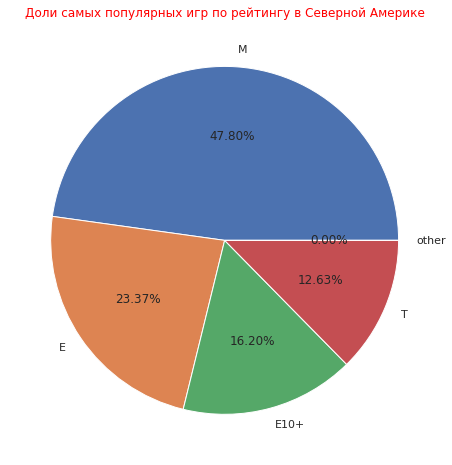

In [98]:
colors = sns.color_palette('deep')[0:6]
plt.title('Доли самых популярных игр по рейтингу в Северной Америке', color='red')
plt.pie(rating_na, labels=rating_na.index, colors=colors, autopct='%.2f%%');

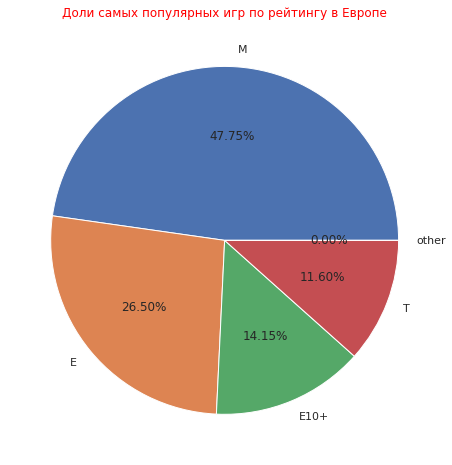

In [99]:
colors = sns.color_palette('deep')[0:6]
plt.title('Доли самых популярных игр по рейтингу в Европе', color='red')
plt.pie(rating_eu, labels=rating_eu.index, colors=colors, autopct='%.2f%%');

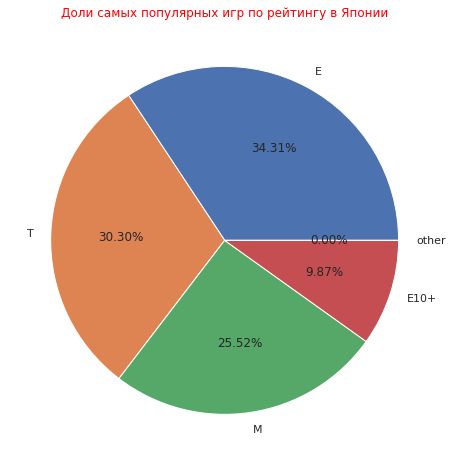

In [100]:
colors = sns.color_palette('deep')[0:6]
plt.title('Доли самых популярных игр по рейтингу в Японии', color='red')
plt.pie(rating_jp, labels=rating_jp.index, colors=colors, autopct='%.2f%%');

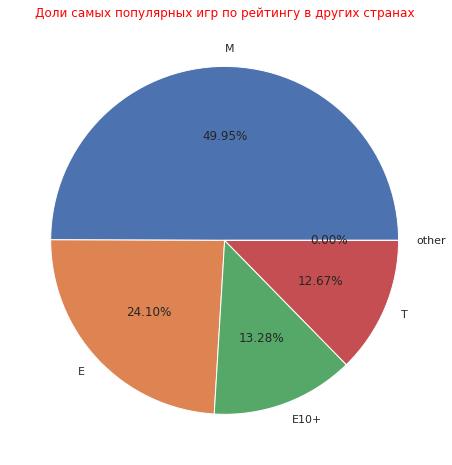

In [101]:
colors = sns.color_palette('deep')[0:6]
plt.title('Доли самых популярных игр по рейтингу в других странах', color='red')
plt.pie(rating_other, labels=rating_other.index, colors=colors, autopct='%.2f%%');

Интересно, что в актуальных данных имеется лишь 4 рейтинга, тогда как во всем фрейме данных из было 8.
В целом по регионам доля проданных игр с учетом их рейтинга сложилась следующая:

В Северной Америке доля продаж игр от их рейтинга составила `M` - 47.8%, `E` - 23,27%, `E10+` - 16,2%, `T` - 12,63%.

В Европе доля продаж игр от их рейтинга составила `M` - 47.75%, `E` - 26,5%, `E10+` - 14,15%, `T` - 11,6%.

В Японии доля продаж игр от их рейтинга составила `E` - 34,31%, `T` - 30,3%, `M` - 25.52%,`E10+` - 9,87%.

В других странах доля продаж игр от их рейтинга составила `M` - 49.95%, `E` - 24,1%, `E10+` - 13,28%, `T` - 12,67%.

Таким образом, в целом по миру, за исключением Японии, рейтинги по популярности расположились в порядке (от большего к меньшему):

- `M` (подходит для лиц страше 17 лет, реалистичное насилие как в реальной жизни, возможны ненормативная лексика, сцены курения табака, алкоголя, накотиков);
- `E` (подходит для всех возрастных категорий, нет сцен могущих напугать маленьких детей и ненормативной лексики);  
- `E10+` (для лиц старше 10 лет, умеренные формы насилия, некоторые сцены могут напугать маленьких детей);
- `T` (для лиц старше 13 лет, возможны чуть более реалистичные сцены насилия).

В то же время в Японии более популярны менее жестокие игры и более приближенные к меньшему возрасту. В данном случае, возможно, играет роль как законодательство Японии, но в большей степени менталитет самих японцев, а также возрастная категория самих пользователей.

**Вывод:** 
1. В ходе изучения общего портрета пользователя каждого региона установлено, что самой популярной платформой в Северной Америке является *X360* и занимает 25,74% рынка, за ней следуют *PS3* с 18,97%, *PS4* с 16,06%, *XOne* с 14,51% и *3DS* с 9,45% рынка. Остальные платформы занимают 15,27% рынка. Две мощные и конкурирующе линейки платформ *Xbox* и *Playstation* занимают таким образом 40,25% и 35,03% соответственно, что для данного региона вполне естественно, так как *Xbox* это американский производитель.

Самой популярной платформой в Европе является *PS4* и занимает 24,08% рынка, за ней следуют *PS3* с 23,35%, *X360* с 16,34%, *XOne* с 9,24% и *3DS* с 8,92% рынка. Остальные платформы занимают 18,06% рынка. Линейки платформ *Xbox* и *Playstation* занимают таким образом 25,58% и 47,43% соответственно, как мы видим в Европе японская компания Sony почти в 2 раза опережает американский *Xbox* по популярности.

Интересно, что самой популярной платформой в Японии является *3DS* и занимает 46,98% рынка (почти половину), за ней следуют *PS3* с 20,02%, *PSV* с 10,3%, *WiiU* с 7,27% и *PSP* с 6,31% рынка. Остальные платформы занимают 9,13% рынка. Почти вся доля рынка занята японскими произвоителями, это Nintendo 3DS и компания Sony. При этом платформы Xbox занимают в Японии всего 1,9% рынка.

Как видно из графика, самой популярной платформой в иных странах в совокупности является *PS3* и занимает 30,42% рынка, за ней следуют *PS4* с 26,94%, *X360* с 14,4%, *XOne* с 8,5% и *3DS* с 5,84% рынка. Остальные платформы занимают 13,9% рынка. Линейки платформ *Xbox* и *Playstation* занимают таким образом 22,9% и 57,36% соответственно, как мы видим в этих странах японская компания Sony более чем в 2 раза опережает американский *Xbox* по популярности. В целом статистка по другим странам похожа на статистику Европы, хотя видно, что в европейских странах консоль Plastation обновляется несколько быстрее.

2. В ходе анализа популярности различных жанров в разных регионах установлено, что в Северной Америке самыми популярными жанрами являтся игры экшн (31,22%), шутеры (23,66%), спортивные (13,6%), ролевые (10,08%) и жанра misk (6,88%). На остальные игровые жанры осталось лишь 14,56% рынка.

В Европе ситуация похожа с Северной Америкой, здесь самыми популярными жанрами являтся игры экшн (33%), шутеры (21,49%), спортивные (12,57%), ролевые (9,36%) и лишь на пятое место, в отличии от предыдуего региона, вышли гоночные игры (6,88%). На остальные игровые жанры осталось 17,95% рынка.

Ситуация по жанрам в Японии выглядит значительно по другому. Топ-5 жанров здесь распределеились следующим образом - ролевые (32,58%), экшн (26,82%), Misc (7,1%), симуляторы (5,94%), драки (5,12%). На остальные игровые жанры осталось 22,45% рынка. Вероятно в случае Японии значительную роль в несколько иной популярности игровых жанров сыграли менталитет и психология жителей Японии. 

В иных странах рейтинги жанров игр распределились как и в Северной Америке, здесь самыми популярными жанрами являтся игры экшн (34,25%), шутеры (22,679%), спортивные (13,72%), ролевые (9,17%) и жанра misk (5,29%). На остальные игровые жанры осталось лишь 14,78% рынка.  

3. В ходе анализа влияния рейтинга ESRB на продажи игр в разных регионах, установлено наличие зависимости между наличием данного рейтинга и количеством продаж. В целом по миру в актуальной части данных имеются сведения о 2364 играх, у которых в 1038 случаях отсутствовал рейтинг ESRB, то есть у 43,91% игр. При этом доля продаж копий таких игр существенно ниже и составляет 22,11%.

Для Северной Америки имеются сведения о 1393 играх, у которых в 298 случаях отсутствовал рейтинг ESRB, то есть у 21,39% игр. При этом доля продаж копий таких игр ниже и составляет 16,86%.

Для Европы имеются сведения о 1512 играх, у которых в 345 случаях отсутствовал рейтинг ESRB, то есть у 22,82% игр. При этом доля продаж копий таких игр ниже и составляет 18,3%. Ситуация в целом похожая на сложившуся в Северной Америке.

Для Японии имеются сведения о 1327 играх, у которых в 774 случаях отсутствовал рейтинг ESRB, то есть у 58,33% игр. При этом доля продаж копий таких игр несколько ниже и составляет 53,84%. Действительно, ситуация в Японии отличается от предыущих регионов, поскольку, вероятно, производители здесь не делают акцент на получении рейтинга на выходящие игры, в то же время игры с рейтингом всё же продаются лучше.

Для остальных стран мира имеются сведения о 1393 играх, у которых в 292 случаях отсутствовал рейтинг ESRB, то есть у 20,96% игр. При этом доля продаж копий таких игр ниже и составляет 17,26%.

Исключительно в Японии было продано 705 игр, у которых в 647 случаях отсутствовал рейтинг ESRB, то есть у 91,77% игр. При этом доля продаж копий таких игр несколько ниже и составляет 89,36%.  Из проведенного анализа можно сделать вывод, что определенной спецификой обладают только игры, продаваемые в Японии, что видимо связано с определенным менталитетом японцев. Для остальных стран игры в целом продаются равномерно, при этом в большинстве случаев издатели получают рейтинг ESRB для своих игр, который выдается ассоциацией в Северной Америке. Как мы видим, большинство игр стараются охватить серьезный и объемный в игровой индустрии рынок Северной Америки. В то же время ввиду особенностей японской игровой индустрии, исключительно для данного региона во многих случаях выпускается большое количество игр, которые не утруждаются получением рейтинга ESRB, поскольку в Японии имеется некоммерческая организация по присвоению рейтинга играм - CERO, сведений о данном рейтинге во фрейме данных нет. 

Что касается того, влияет ли наличие рейтинга ESRB на увеличение количества продаж, из имеющегося фрейма данных точно ответить невозможно, поскольку зависимость видна, но не ясна суть их взаимосвязи. С одной стороны возможно, что наличие рейтинга ESRB в большей степени может поддалкивать пользователя к покупке данной игры, в то же время и сами производители игр могут стараться определить рейтинг ESRB для потенциально популярных в будущем игр, а на получение такого рейтинга для вероятно невысоких по популярности игр ресурсы не растрачивать.

В целом по регионам доля проданных игр с учетом их рейтинга сложилась следующая:
- в Северной Америке доля продаж игр от их рейтинга составила `M` - 47.8%, `E` - 23,27%, `E10+` - 16,2%, `T` - 12,63%.
- в Европе доля продаж игр от их рейтинга составила `M` - 47.75%, `E` - 26,5%, `E10+` - 14,15%, `T` - 11,6%.
- в Японии доля продаж игр от их рейтинга составила `E` - 34,31%, `T` - 30,3%, `M` - 25.52%,`E10+` - 9,87%.
- в других странах доля продаж игр от их рейтинга составила `M` - 49.95%, `E` - 24,1%, `E10+` - 13,28%, `T` - 12,67%.

Таким образом, в целом по миру, за исключением Японии, рейтинги по популярности расположились в порядке (от большего к меньшему):
- `M` (подходит для лиц страше 17 лет, реалистичное насилие как в реальной жизни, возможны ненормативная лексика, сцены курения табака, алкоголя, накотиков);
- `E` (подходит для всех возрастных категорий, нет сцен могущих напугать маленьких детей и ненормативной лексики);  
- `E10+` (для лиц старше 10 лет, умеренные формы насилия, некоторые сцены могут напугать маленьких детей);
- `T` (для лиц старше 13 лет, возможны чуть более реалистичные сцены насилия).

В то же время в Японии более популярны менее жестокие игры и более приближенные к меньшему возрасту. В данном случае, возможно, играет роль как законодательство Японии, но в большей степени менталитет самих японцев, а также возрастная категория самих пользователей.

### Проверка гипотез.

#### Проверка гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Перед проверкой гипотез следует вспомнить, что нам придется сравнивать генеральные совокупности, значением которых будут оценки пользователей, а нами на этапе предобработки были внесены в них измения, а именно мы заменили отсутствующие значения числом **-1**, а обозначенным как `tbd` присвоили значение **-2**. Таким образом, использовать данные случаи мы не можем, в связи с чем освободим актуальную часть данных (а мы продолжаем анализ именно по актуальным данным) от таких случаев.

In [102]:
user_score_actual = df_actual.loc[df_actual['user_score'] >= 0]
user_score_actual.shape[0]

1274

1274 случая видятся достаточными для проверки гипотез. Далее определим генеральные совокупности, значения которых мы будем в дальнейшем использовать для проверки гипотезы. Нам следует отобрать значения стоца `'user_score'` по платформам *Xbox One* и *PC*. Также посмотрим на их размер.

In [103]:
user_score_actual_xone = user_score_actual.loc[user_score_actual['platform'] == 'XOne', 'user_score']
print(user_score_actual_xone.shape[0])
user_score_actual_pc = user_score_actual.loc[user_score_actual['platform'] == 'PC', 'user_score']
print(user_score_actual_pc.shape[0])

116
165


**116** значений в генеральной совокупности оценок пользователей по платформе *Xbox One* и **165** для платформы *PC* вполне достаточно для проверки гипотезы. 

Итак, за нулевую гипотезу примем то, что средние оценки пользователей платформ *Xbox One* и *PC* одинаковы. 

Тогда альтернативной гипотезой будет то, что средние оценки пользователей платформ *Xbox One* и *PC* разные.

Мы не планируем использовать дополнительный параметр `equal_var=False`, потому что у нас достаточно большие и одинаковые по размеру выборки, к тому же в обеих измерена одна и та же переменная — оценки пользоваталей, поэтому нет оснований полагать, что разброс будет сильно отличаться. Уровень статистической значимости примем за 0,05. 

In [104]:
results = st.ttest_ind(user_score_actual_xone, user_score_actual_pc, equal_var=True)
# alpha = задайте значение уровня значимости
alpha = .05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.981369790613591
Не получилось отвергнуть нулевую гипотезу


Как видим, каких-либо оснований полагать, что нулевая гипотеза неверна, не имеется. К тому же значение p-value в данном случае настолько огромно, свыше 0,98, что просто напрашивается вывод о том, что средние оценки пользователей платформ *Xbox One* и *PC* одинаковы.

#### Проверка гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные

Определим генеральные совокупности, значения которых мы будем в дальнейшем использовать для проверки гипотезы. Нам следует отобрать значения стоца `'user_score'` по жанрам *Action* и *Sports*. Также посмотрим на их размер.

In [105]:
user_score_actual_action = user_score_actual.loc[user_score_actual['genre'] == 'Action', 'user_score']
print(user_score_actual_action.shape[0])
user_score_actual_sports = user_score_actual.loc[user_score_actual['genre'] == 'Sports', 'user_score']
print(user_score_actual_sports.shape[0])

443
158


**443** значения в генеральной совокупности оценок пользователей по жанру *Action* и **158** по жанру *Sports* вполне достаточно для проверки гипотезы. 

Итак, за нулевую гипотезу примем то, что средние оценки пользователей жанров *Action* и *Sports* одинаковы. 

Тогда альтернативной гипотезой будет то, что средние оценки пользователей жанров *Action* и *Sports* разные.

В данном случае мы будем использовать дополнительный параметр `equal_var=False`, потому что у нас различные по размеру выборки, поэтому разброс, может отличаться. Уровень статистической значимости примем за 0,01. 

In [106]:
results = st.ttest_ind(user_score_actual_action, user_score_actual_sports, equal_var=False)
# alpha = задайте значение уровня значимости
alpha = .05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.6803715379372367e-18
Отвергаем нулевую гипотезу


Как видим, у нас имеются все основания отвергнуть нулевую гипотезу в пользу альтернативной. Значение p-value в данном случае настолько ничтожно (цифры, отличные от нуля, появляются только в 18 знаке после запятой числа), и укаывает нам, что с такой вероятностью при верности гипотезы о том, что оценки пользователей данных жанров равны, можно получить такое значение. С куда большим шансом можно выстрелить вслепую из лука на Северном полюсе и подстрелить при этом верблюда. Таким образом, просто напрашивается вывод о том, что средние оценки пользователей жанров *Action* и *Spors* разные.

**Вывод:** 
В ходе проверки гипотез было установлено, что гипотеза о том, что средние оценки пользователей платформ *Xbox One* и *PC* одинаковы, верна. Значение p-value в данном случае настолько огромно, свыше 0,98, что просто невозможно было ее опровергнуть. Данное обстоятельство, верятно, свидетельствует об одинаковости пользователей обеих платформ, в принципе это те же люди, играющие в схоже игры, просто на различных платформах.

Гипотеза о том, что средние оценки пользователей жанров *Action* и *Spors* разные, также была подтверждена. Посе принятия за нулевую гипотезу предположение об их одинаковости, значение p-value оказалось настолько ничтожно (значения отличные от нуля появляются только в 18 знаке после запятой), что очевидно напрашивался вывод, что средние оценки пользователей жанров *Action* и *Spors* разные. Данный факт, возможно, свидетельствует о том, что пользователи, предпочитающие эти разные жанры, имеют раличия в собственной психологии настолько существенные, что это влияет на характер оценки ими этих игр, с другой стороны возможно, что сам процесс производства игр этих жанров может быть существенно различен, что в свою очередь влияет на качество игр.   

### Общий вывод.

В ходе проведенного анализа мы проверили данные на наличие пропусков, ошибок, дубликатов, по возможности исправили все недостатки данных. Затем провели исследовательский анализ продаж игр по годам, платфомам и жанрам игр, определили платформы и жанры наиболее популярные в отдельных регионах, а также оценили влияние рейтинга ESRB на продажи, после чего проверили ряд гипотез. По результатам чего пришли к следующим выводам:

1). Из предварительного посмотра фрейма данных, установлены сведения о продажах 16715 компьютерных игр. При этом, поскольку сведения о продажах приведены по регионам (Северная Америка, Европа, Япония и другие), имеются основания полагать, что в значительном количестве случаев игры продавалсь не во всех регионах, в связи с чем имеются нулевые сведения о продажах игр в конкреном регионе более чем в 25% случаев (для Японии в более чем 50% случаях). Оценивая данные, содержащие сведения по 2, 3 квартилям и максимальному значению, имеются основания полагать, что в целом болшее количество игр продавалось в Северной Америке, а наименьшее в Японии и в других (не Северная Америка, Европа или Япония) странах (показатели продаж в Японии и других странах в целом близкие по размерам). Наибольшее количество игр выходило в период с 2003 по 2010 гг. (50% за 8 лет из общей выборки за 37 лет с 1980 по 2016 гг.), в период с 1980 по 2003 год игр выходило значительно меньше, также после 2010 года имеется тенденция к снижению их количества.

2). В ходе предобработки данных мы решили вопрос пропусков в ряде стобцов (оставив их только в колонке `'rating'`, где они нам не препятствуют дальнейшей работе), изменили тип данных в стобцах `'year_of_release'`, `'critic_score'` и `'user_score'`, добавили столбец с данными об общей продаже игр во всех регионах, проверили датафрейм на явные дубликаты. Также обратили внимание, что встречаются игры имеющие одинаковое название, но в таком случае они выходили на различных платформах или это были локализации для различых регионов, таким образом, это разные варианты одной игры.

3). В ходе исследовательского анализа мы просмотрели количество релизов игр по годам, а также то, как менялись продажи по платформам. В частности установлено, что за период с 1980 по 2016 гг. платформой с самым большим количеством продаваемых игр оказалась *PS2*, для которой было продано свыше 1,2 миллиарда копий игр. В то же время платформы недолговечны (за исключением разве что платформы PC в силу ее особенностей), средний срок жизни платформы оставляет примерно 7,7 лет, после чего в силу устаревания платформы, для нее пересают выпускаться новые игры. 

В то же время мы установили, что в силу каких-то причин, количество продаж в зависимости от года, изменялось, в связи с чем было принято решение о дальнейшей работе в целях планирования компании на следующий год (по условию 2017) только с актуальными данными, поскольку устаревшие данные лишь внесут искажения в виводы в силу их несоответствия требованиям времени. Также было принято решение оказаться от использования данных за 2016 год в силу их неполноты, в связи с чем невозможно предсказать, каким образом это может отразиться на выводах. Таким обазом, актуальными данными было решено считать сведения за 2012-2015 гг. 

В ходе анализа установлено, что рост продаж игр показывают две платформы *PS4* и *XOne*, которые пришли на смену показывающих существенный спад продаж с момента их появления соотвественно *PS3* и *X360*. Все остальные платформы показывают небольшой спад. В то же время и у некоторых других платформ встречаются отдельные игры, которые также продавались очень хорошо, например, игры с продажами свыше 5 млн. копий имеются также на платформах *X360, PS3, 3DS, Wii, WiiU* и даже на *PC*.   

При анализе степени корреляции продаж с оценками критиков и пользователей на примере платформ *XOne* и *PS4*, прослеживается средняя степень линейной зависимости между оценкой критиков и объемом продаж игр (коэффициент в районе 0.43-0.46), в то же время между оценкой пользователей и объемом продаж линейной зависимости практически не прослеживается. Это, вероятно, связано с разным характером и целями оценок критиков и пользователей. В то время как зачастую критикам доступна предварительная оценка игр (через бета-тестирования, предоставление для ознакомления до даты релиза и т.п.) в целях того, чтобы он оценил игру и дал свою оценку (предполагается, что разработчик расчитывает на высокую оценку), которая будет получена до официального старта продаж и, возможно, высокие оценки критиков будут способствовать росту продаж. В то же время большинство пользователей дают оценку игре уже после официального релиза и ее приобретения, при том, что в силу особенностей формирования оценки пользователей (это общее мнение большого количества пользователей) более менее окончательная оценка будет дана после участия в этом многих пользователей. Таким образом оценка пользователей гораздо в меньшей степени либо вообще не способна повлиять на объем продаж игры. В то же время и оценка критиков не всегда сама по себе способна оказать существенное влияние на объем продаж, поскольку на него влияют и другие факторы (реклама, маркетинг, наличие популярных прародителей игры, фан-сообщества и т.п.). Влияние же оценки критиков на других платформах еще меньше, чем на платформах *XOne* и *PS4*. Возможно это связано с большим разнообазием самих платформ, среди которых имеются любители именно конкретной платформы, выход игры на которой может сам по себе создает значительный стимул к ее приобретению, из-за чего соответственно уменьшается влияние критиков.

В ходе анализа игровых жанров в свете количества их продаж установлено, что наибольшее количество продаж наблюдается у игр жанра *Action*, на втором месте жанра *Shooter*, наименьшими продажами характеризуются игры жанра *Puzzle* и *Strategy*. В тоже время однозначно выразится в данном случае нельзя, ведь из анализа следует, что объемом 413 млн. копий разошлось 846 разных игр жанра *Action*, в то время как различных игр жанра *Shooter* было всего 190, а разошлись они тиражем в 266 млн. копий. В целом данные показывают степень потребности пользователей в играх того или иного жанра и объем целевой аудитории жанра.

4). В ходе изучения общего портрета пользователя каждого региона установлено, что самой популярной платформой в Северной Америке является *X360* и занимает 25,74% рынка, за ней следуют *PS3* с 18,97%, *PS4* с 16,06%, *XOne* с 14,51% и *3DS* с 9,45% рынка. Остальные платформы занимают 15,27% рынка. Две мощные и конкурирующе линейки платформ *Xbox* и *Playstation* занимают таким образом 40,25% и 35,03% соответственно, что для данного региона вполне естественно, так как *Xbox* это американский производитель.

Самой популярной платформой в Европе является *PS4* и занимает 24,08% рынка, за ней следуют *PS3* с 23,35%, *X360* с 16,34%, *XOne* с 9,24% и *3DS* с 8,92% рынка. Остальные платформы занимают 18,06% рынка. Линейки платформ *Xbox* и *Playstation* занимают таким образом 25,58% и 47,43% соответственно, как мы видим в Европе японская компания Sony почти в 2 раза опережает американский *Xbox* по популярности.

Интересно, что самой популярной платформой в Японии является *3DS* и занимает 46,98% рынка (почти половину), за ней следуют *PS3* с 20,02%, *PSV* с 10,3%, *WiiU* с 7,27% и *PSP* с 6,31% рынка. Остальные платформы занимают 9,13% рынка. Почти вся доля рынка занята японскими произвоителями, это Nintendo 3DS и компания Sony. При этом платформы Xbox занимают в Японии всего 1,9% рынка.

Как видно из графика, самой популярной платформой в иных странах в совокупности является *PS3* и занимает 30,42% рынка, за ней следуют *PS4* с 26,94%, *X360* с 14,4%, *XOne* с 8,5% и *3DS* с 5,84% рынка. Остальные платформы занимают 13,9% рынка. Линейки платформ *Xbox* и *Playstation* занимают таким образом 22,9% и 57,36% соответственно, как мы видим в этих странах японская компания Sony более чем в 2 раза опережает американский *Xbox* по популярности. В целом статистка по другим странам похожа на статистику Европы, хотя видно, что в европейских странах консоль Plastation обновляется несколько быстрее.

5). В ходе анализа популярности различных жанров в разных регионах установлено, что в Северной Америке самыми популярными жанрами являтся игры экшн (31,22%), шутеры (23,66%), спортивные (13,6%), ролевые (10,08%) и жанра misk (6,88%). На остальные игровые жанры осталось лишь 14,56% рынка.

В Европе ситуация похожа с Северной Америкой, здесь самыми популярными жанрами являтся игры экшн (33%), шутеры (21,49%), спортивные (12,57%), ролевые (9,36%) и лишь на пятое место, в отличии от предыдуего региона, вышли гоночные игры (6,88%). На остальные игровые жанры осталось 17,95% рынка.

Ситуация по жанрам в Японии выглядит значительно по другому. Топ-5 жанров здесь распределеились следующим образом - ролевые (32,58%), экшн (26,82%), Misc (7,1%), симуляторы (5,94%), драки (5,12%). На остальные игровые жанры осталось 22,45% рынка. Вероятно в случае Японии значительную роль в несколько иной популярности игровых жанров сыграли менталитет и психология жителей Японии. 

В иных странах рейтинги жанров игр распределились как и в Северной Америке, здесь самыми популярными жанрами являтся игры экшн (34,25%), шутеры (22,679%), спортивные (13,72%), ролевые (9,17%) и жанра misk (5,29%). На остальные игровые жанры осталось лишь 14,78% рынка.  

6). В ходе анализа влияния рейтинга ESRB на продажи игр в разных регионах, установлено наличие зависимости между наличием данного рейтинга и количеством продаж. В целом по миру в актуальной части данных имеются сведения о 2364 играх, у которых в 1038 случаях отсутствовал рейтинг ESRB, то есть у 43,91% игр. При этом доля продаж копий таких игр существенно ниже и составляет 22,11%.

Для Северной Америки имеются сведения о 1393 играх, у которых в 298 случаях отсутствовал рейтинг ESRB, то есть у 21,39% игр. При этом доля продаж копий таких игр ниже и составляет 16,86%.

Для Европы имеются сведения о 1512 играх, у которых в 345 случаях отсутствовал рейтинг ESRB, то есть у 22,82% игр. При этом доля продаж копий таких игр ниже и составляет 18,3%. Ситуация в целом похожая на сложившуся в Северной Америке.

Для Японии имеются сведения о 1327 играх, у которых в 774 случаях отсутствовал рейтинг ESRB, то есть у 58,33% игр. При этом доля продаж копий таких игр несколько ниже и составляет 53,84%. Действительно, ситуация в Японии отличается от предыущих регионов, поскольку, вероятно, производители здесь не делают акцент на получении рейтинга на выходящие игры, в то же время игры с рейтингом всё же продаются лучше.

Для остальных стран мира имеются сведения о 1393 играх, у которых в 292 случаях отсутствовал рейтинг ESRB, то есть у 20,96% игр. При этом доля продаж копий таких игр ниже и составляет 17,26%.

Исключительно в Японии было продано 705 игр, у которых в 647 случаях отсутствовал рейтинг ESRB, то есть у 91,77% игр. При этом доля продаж копий таких игр несколько ниже и составляет 89,36%.  Из проведенного анализа можно сделать вывод, что определенной спецификой обладают только игры, продаваемые в Японии, что видимо связано с определенным менталитетом японцев. Для остальных стран игры в целом продаются равномерно, при этом в большинстве случаев издатели получают рейтинг ESRB для своих игр, который выдается ассоциацией в Северной Америке. Как мы видим, большинство игр стараются охватить серьезный и объемный в игровой индустрии рынок Северной Америки. В то же время ввиду особенностей японской игровой индустрии, исключительно для данного региона во многих случаях выпускается большое количество игр, которые не утруждаются получением рейтинга ESRB, поскольку в Японии имеется некоммерческая организация по присвоению рейтинга играм - CERO, сведений о данном рейтинге во фрейме данных нет. 

Что касается того, влияет ли наличие рейтинга ESRB на увеличение количества продаж, из имеющегося фрейма данных точно ответить невозможно, поскольку зависимость видна, но не ясна суть их взаимосвязи. С одной стороны возможно, что наличие рейтинга ESRB в большей степени может поддалкивать пользователя к покупке данной игры, в то же время и сами производители игр могут стараться определить рейтинг ESRB для потенциально популярных в будущем игр, а на получение такого рейтинга для вероятно невысоких по популярности игр ресурсы не растрачивать.

В целом по регионам доля проданных игр с учетом их рейтинга сложилась следующая:
- в Северной Америке доля продаж игр от их рейтинга составила `M` - 47.8%, `E` - 23,27%, `E10+` - 16,2%, `T` - 12,63%.
- в Европе доля продаж игр от их рейтинга составила `M` - 47.75%, `E` - 26,5%, `E10+` - 14,15%, `T` - 11,6%.
- в Японии доля продаж игр от их рейтинга составила `E` - 34,31%, `T` - 30,3%, `M` - 25.52%,`E10+` - 9,87%.
- в других странах доля продаж игр от их рейтинга составила `M` - 49.95%, `E` - 24,1%, `E10+` - 13,28%, `T` - 12,67%.

Таким образом, в целом по миру, за исключением Японии, рейтинги по популярности расположились в порядке (от большего к меньшему):
- `M` (подходит для лиц страше 17 лет, реалистичное насилие как в реальной жизни, возможны ненормативная лексика, сцены курения табака, алкоголя, накотиков);
- `E` (подходит для всех возрастных категорий, нет сцен могущих напугать маленьких детей и ненормативной лексики);  
- `E10+` (для лиц старше 10 лет, умеренные формы насилия, некоторые сцены могут напугать маленьких детей);
- `T` (для лиц старше 13 лет, возможны чуть более реалистичные сцены насилия).

В то же время в Японии более популярны менее жестокие игры и более приближенные к меньшему возрасту. В данном случае, возможно, играет роль как законодательство Японии, но в большей степени менталитет самих японцев, а также возрастная категория самих пользователей.

7). В ходе проверки гипотез было установлено, что гипотеза о том, что средние оценки пользователей платформ *Xbox One* и *PC* одинаковы, верна. Значение p-value в данном случае настолько огромно, свыше 0,98, что просто невозможно было ее опровергнуть. Данное обстоятельство, верятно, свидетельствует об одинаковости пользователей обеих платформ, в принципе это те же люди, играющие в схоже игры, просто на различных платформах.

Гипотеза о том, что средние оценки пользователей жанров *Action* и *Spors* разные, также была подтверждена. Посе принятия за нулевую гипотезу предположение об их одинаковости, значение p-value оказалось настолько ничтожно (цифры, отличные от нуля, появляются только в 18 знаке после запятой этого числа), что очевидно напрашивался вывод, что средние оценки пользователей жанров *Action* и *Spors* разные. Данный факт, возможно, свидетельствует о том, что пользователи, предпочитающие эти разные жанры, имеют раличия в собственной психологии настолько существенные, что это влияет на характер оценки ими этих игр, с другой стороны возможно, что сам процесс производства игр этих жанров может быть существенно различен, что в свою очередь влияет на качество игр.